In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df_train=pd.read_csv("train.csv")

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

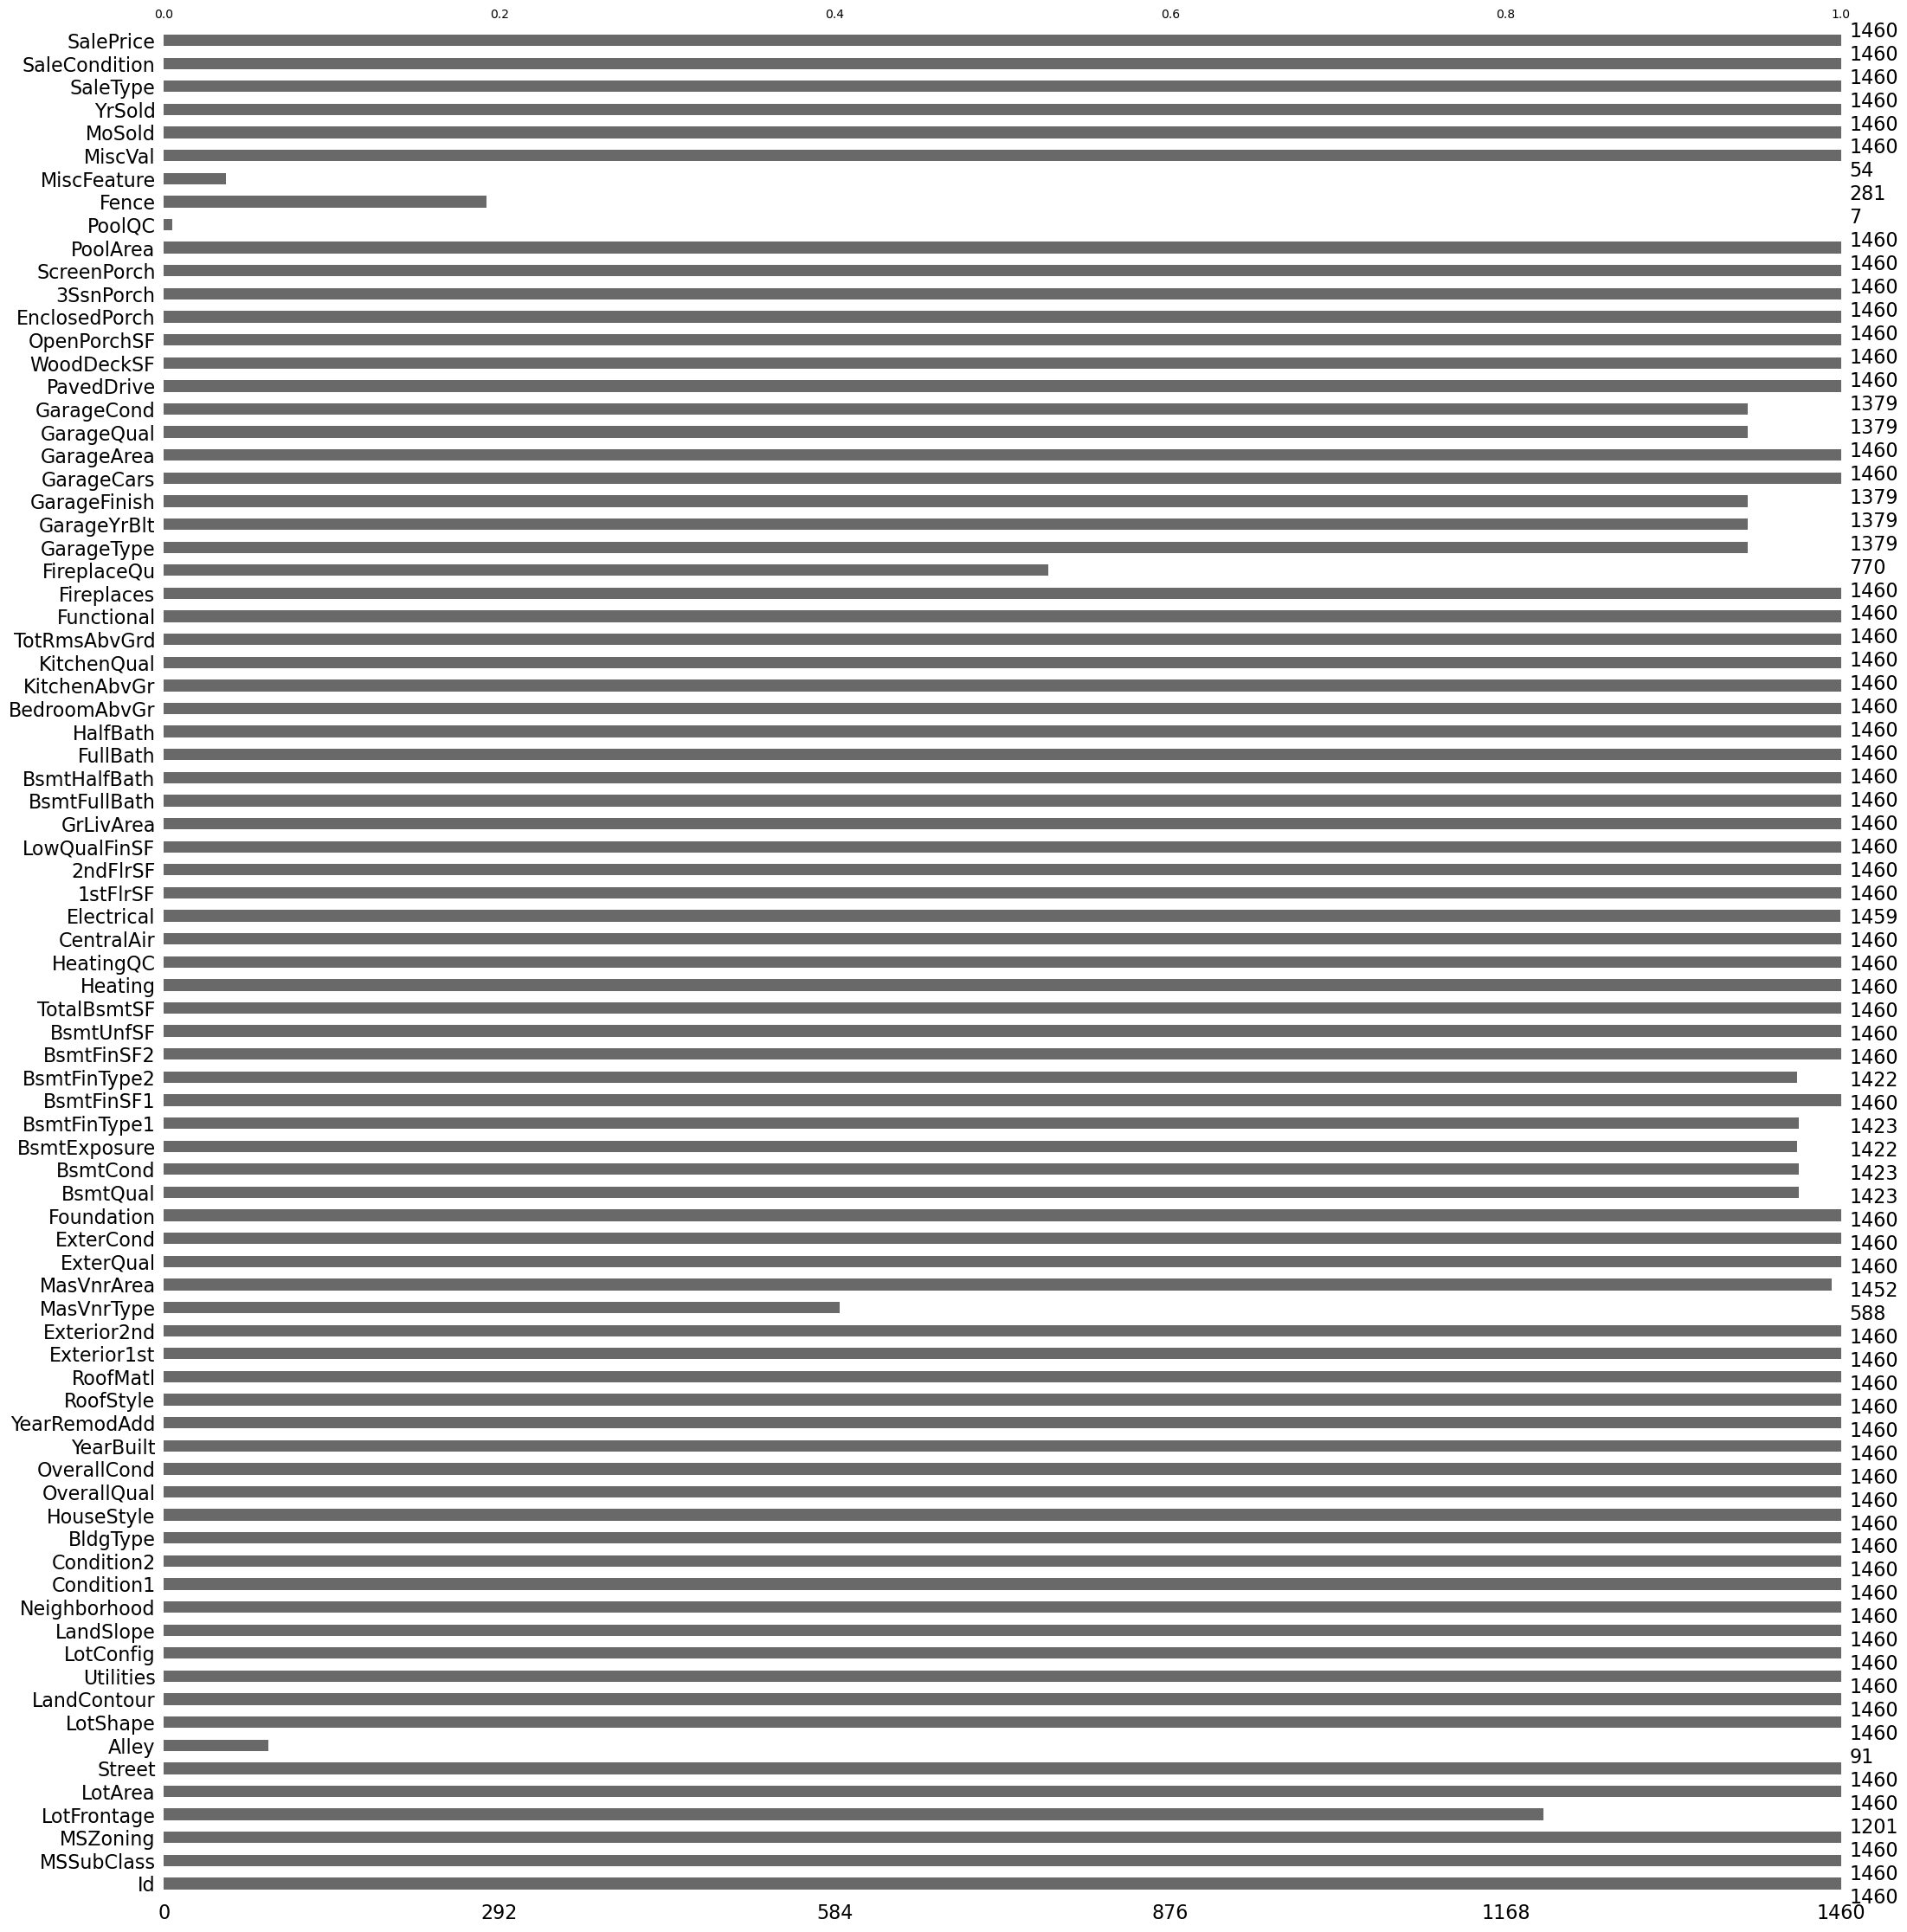

In [6]:
msno.bar(df_train) 

In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

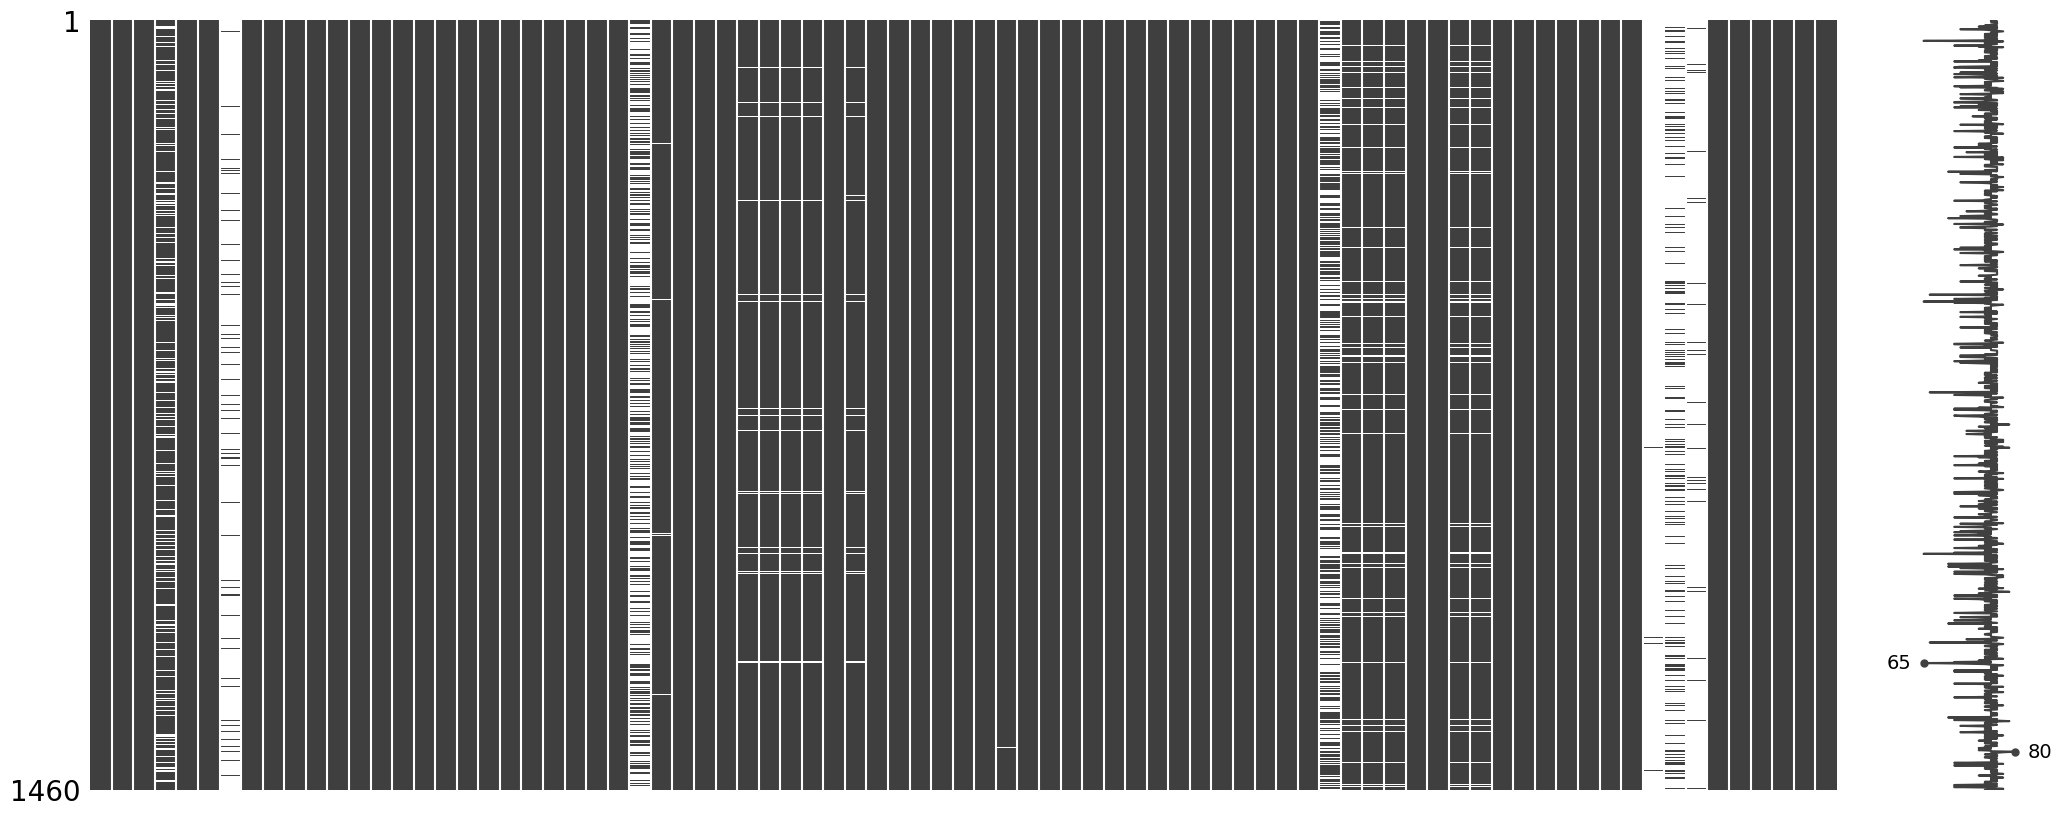

In [10]:
msno.matrix(df_train) 

In [11]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [12]:
df_test=pd.read_csv("test.csv")

In [13]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_test.shape

(1459, 80)

In [16]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [17]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

<Axes: >

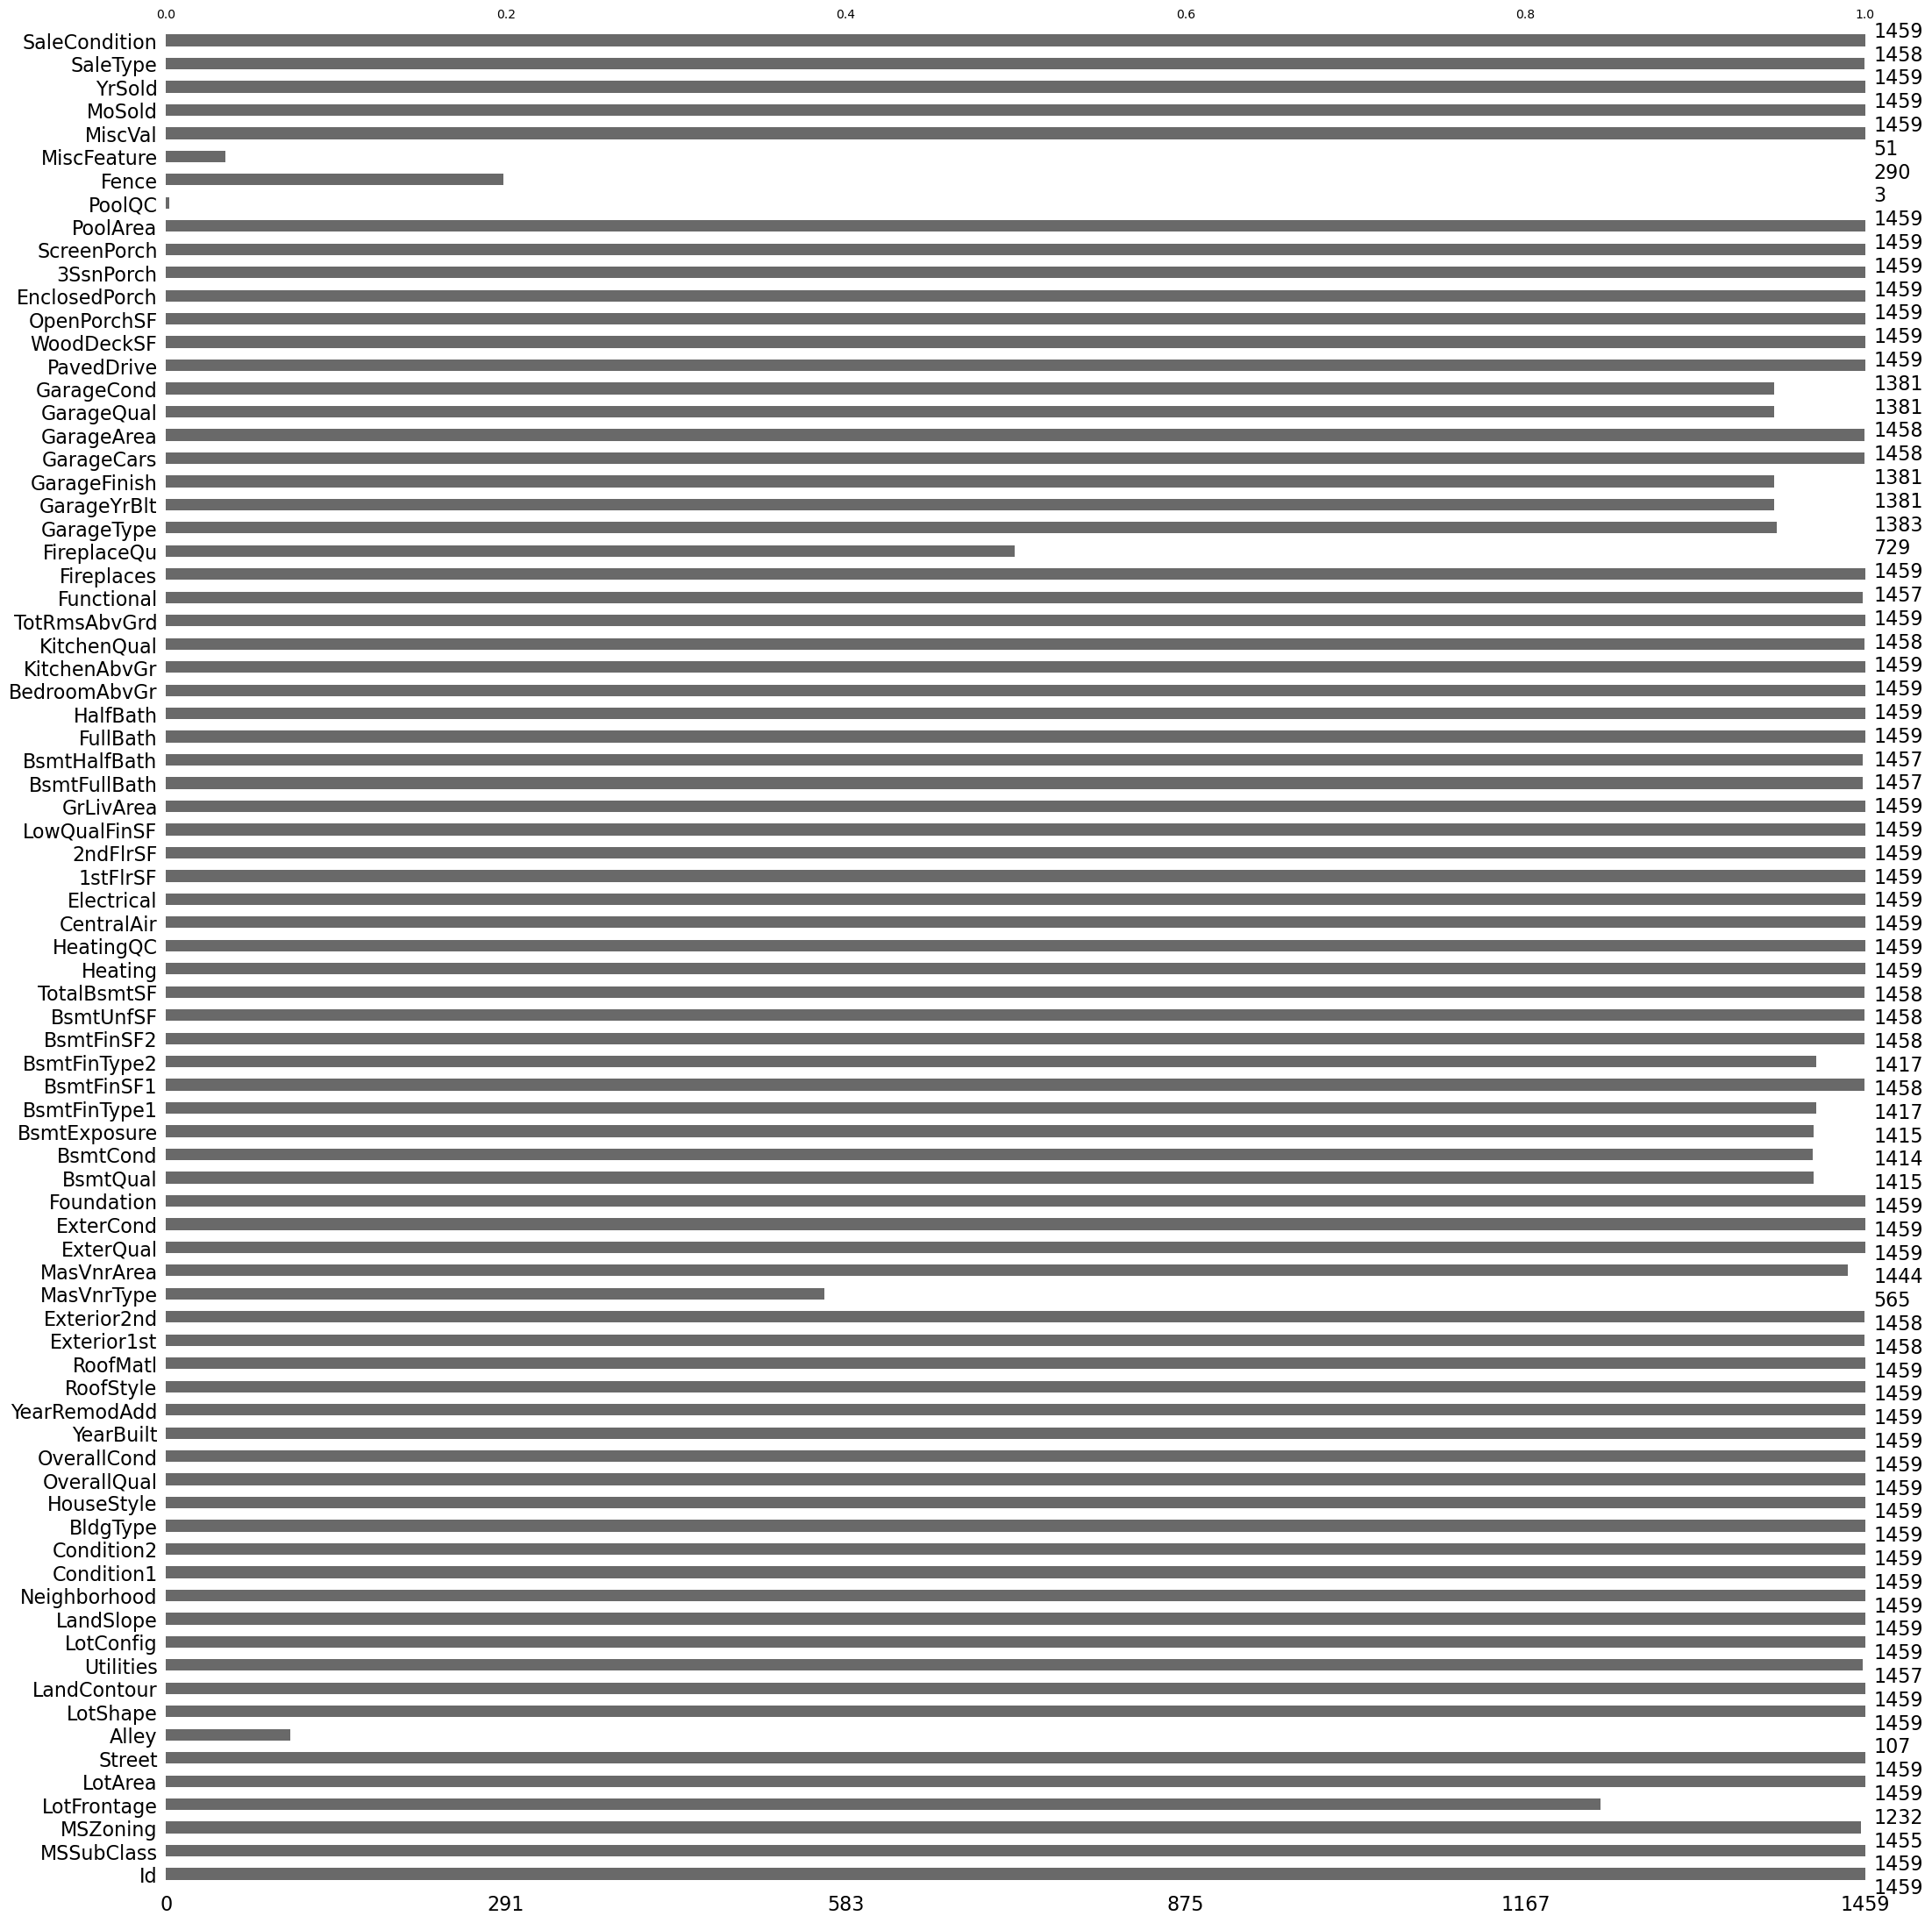

In [18]:
msno.bar(df_test)

In [19]:
df_sample=pd.read_csv("sample_submission.csv")

In [20]:
df_sample.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [21]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [22]:
df_sample.describe()

Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179183.918243
std     421.321334   16518.303051
min    1461.000000  135751.318893
25%    1825.500000  168703.011202
50%    2190.000000  179208.665698
75%    2554.500000  186789.409363
max    2919.000000  281643.976117

<Axes: >

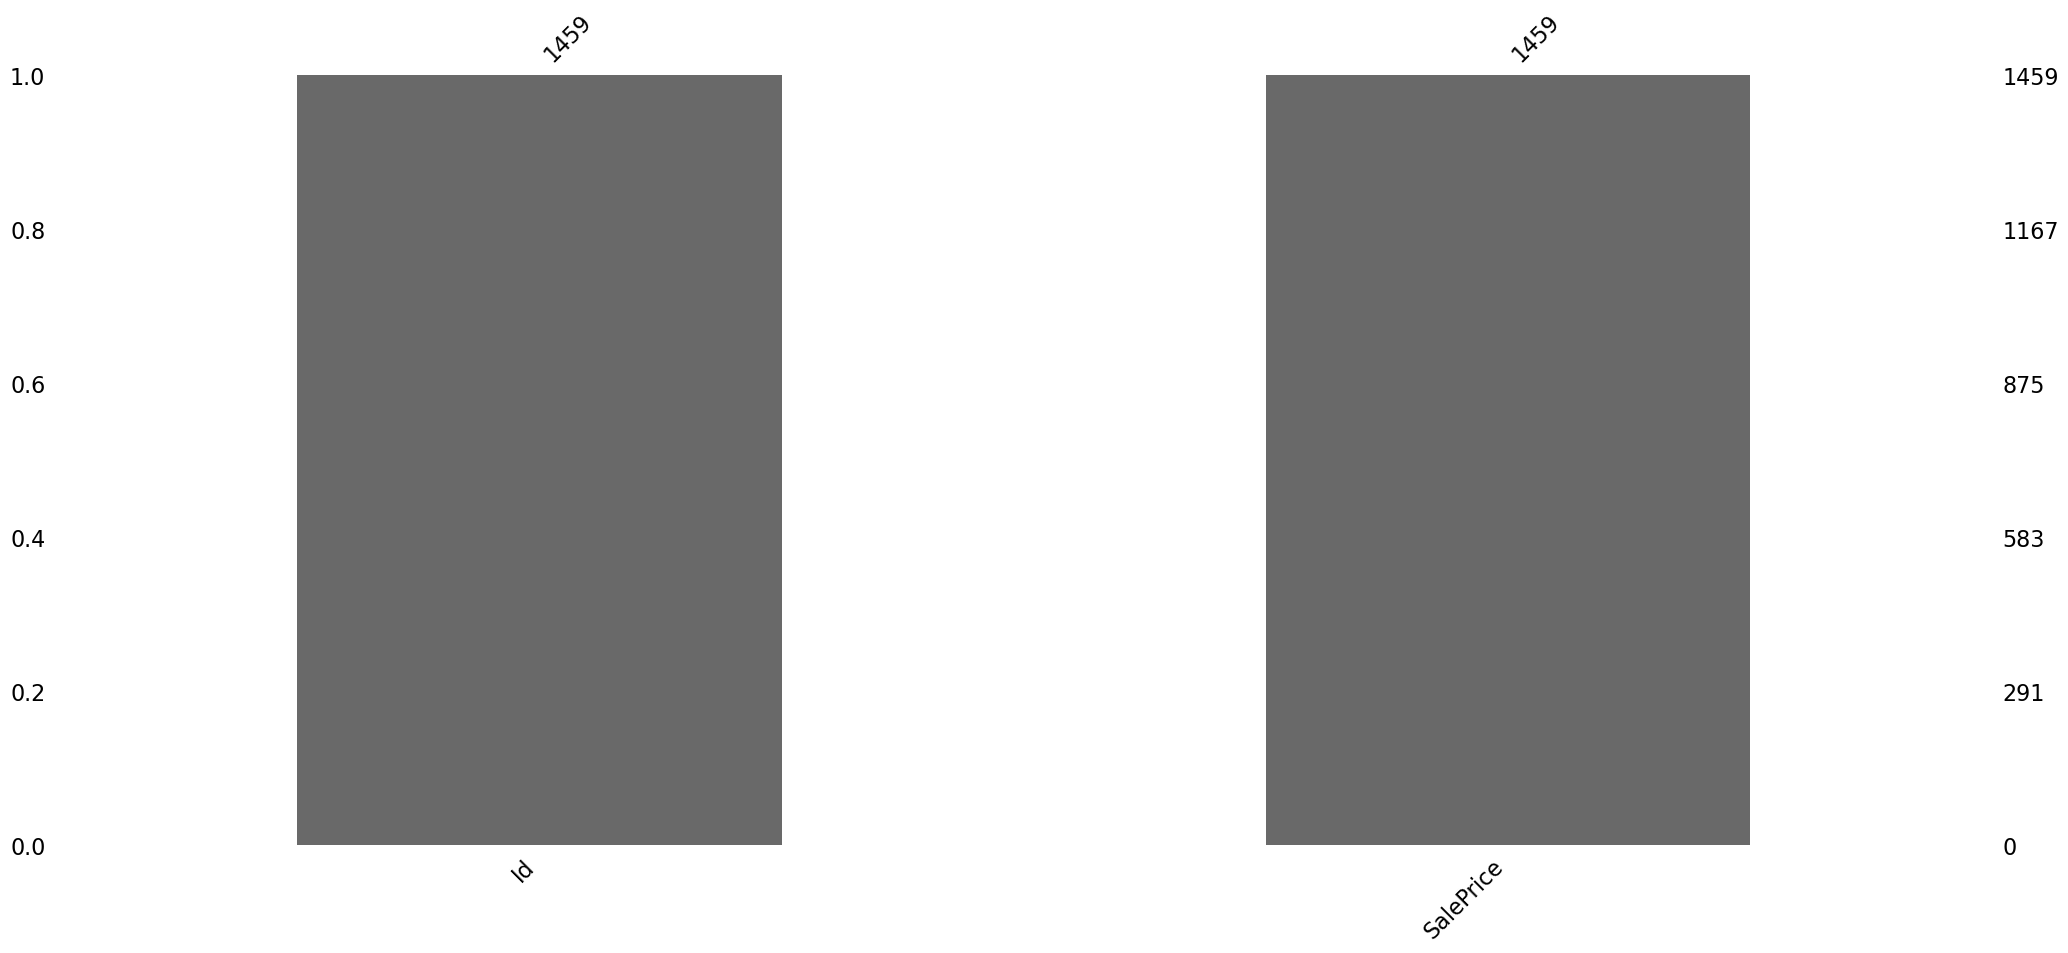

In [23]:
msno.bar(df_sample)

In [24]:
df_test.shape

(1459, 80)

In [25]:
df_sample.shape

(1459, 2)

In [26]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
df_sample.columns

Index(['Id', 'SalePrice'], dtype='object')

In [29]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [30]:
df_sample.isnull().sum()

Id           0
SalePrice    0
dtype: int64

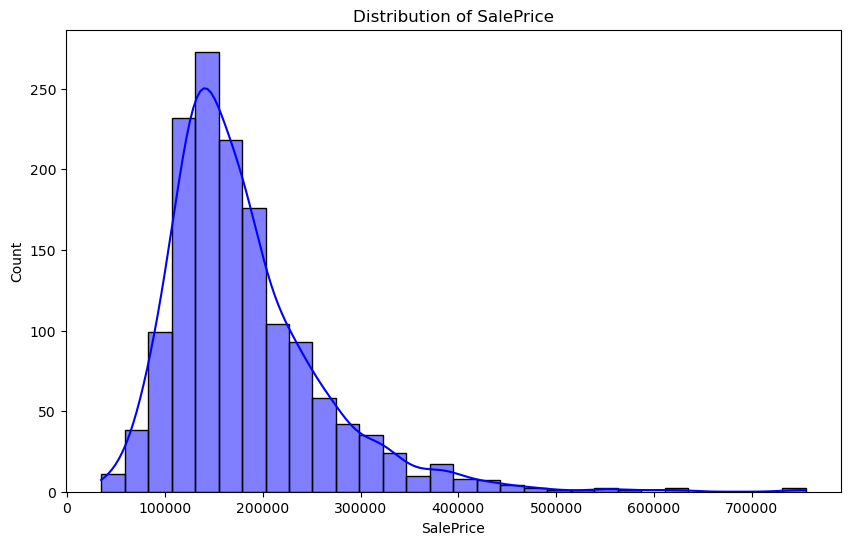

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df_train['SalePrice'], kde=True, color='b', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

In [33]:
numerical_features = df_train.select_dtypes(include=[np.number])

In [34]:
correlation_matrix = numerical_features.corr()

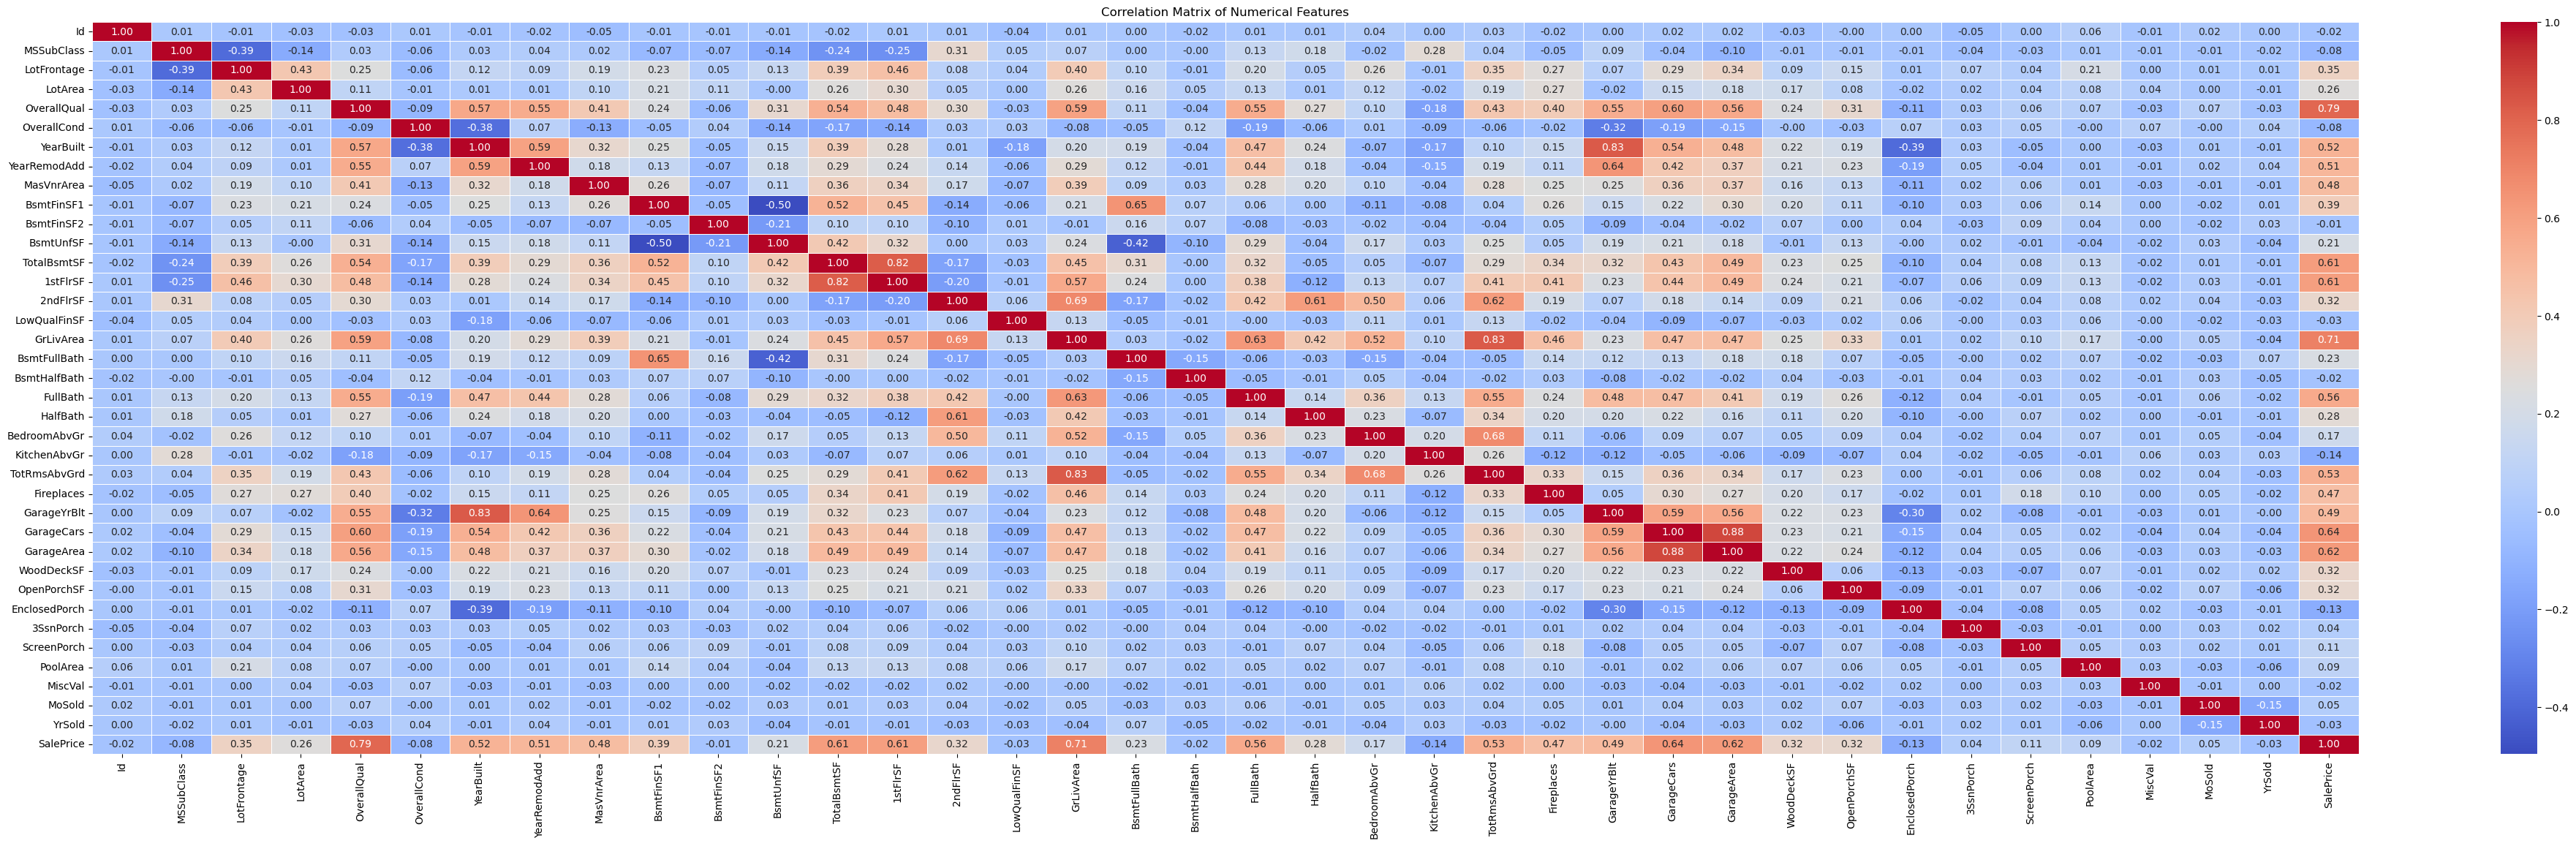

In [35]:
plt.figure(figsize=(50,13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

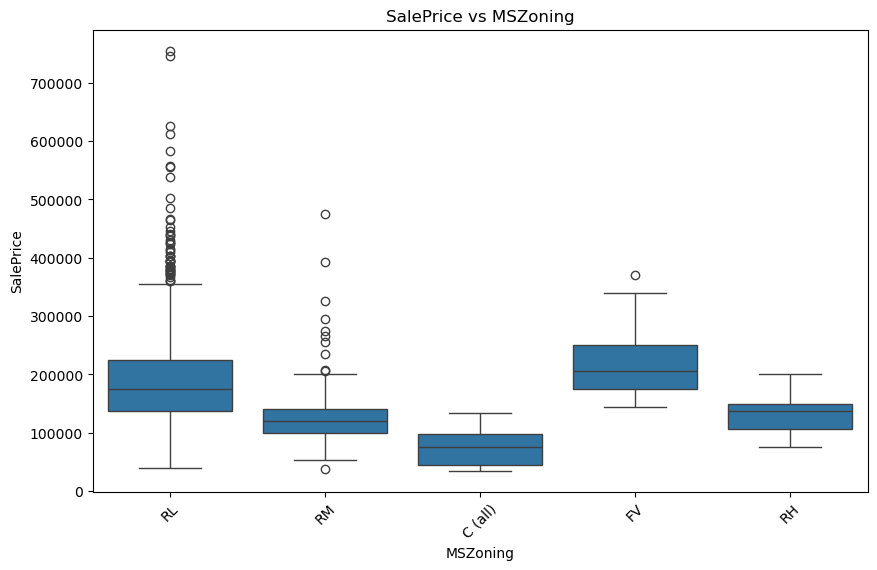

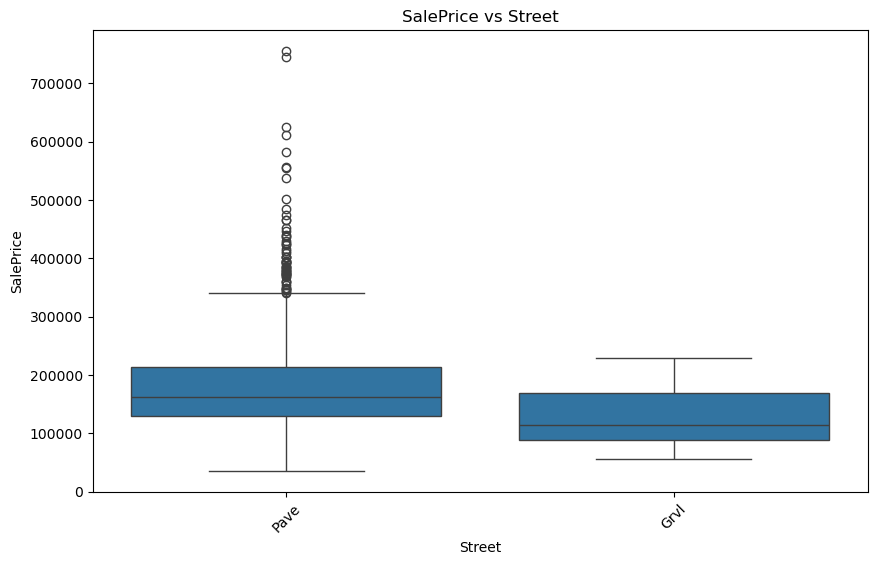

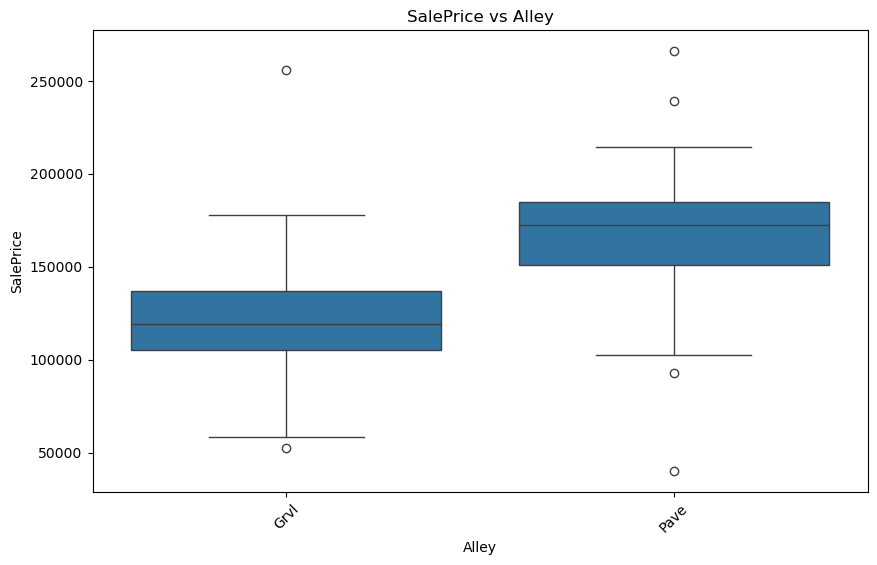

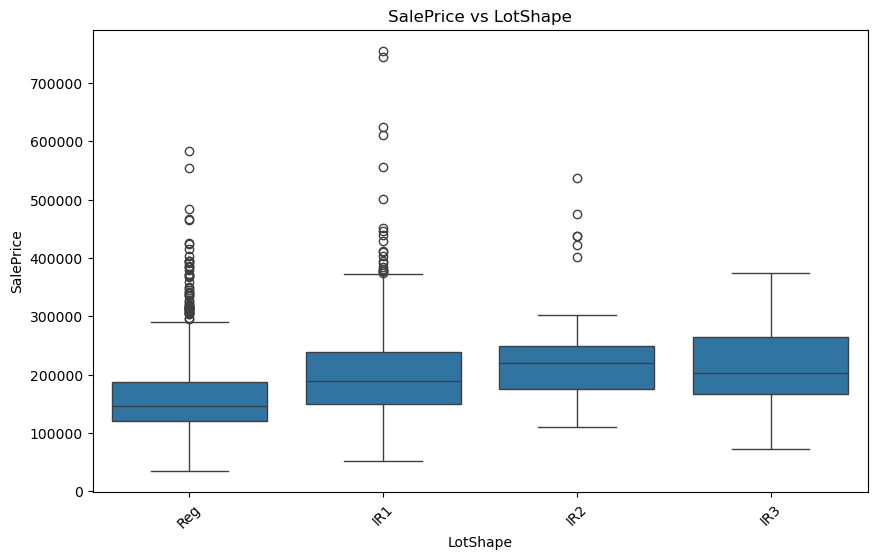

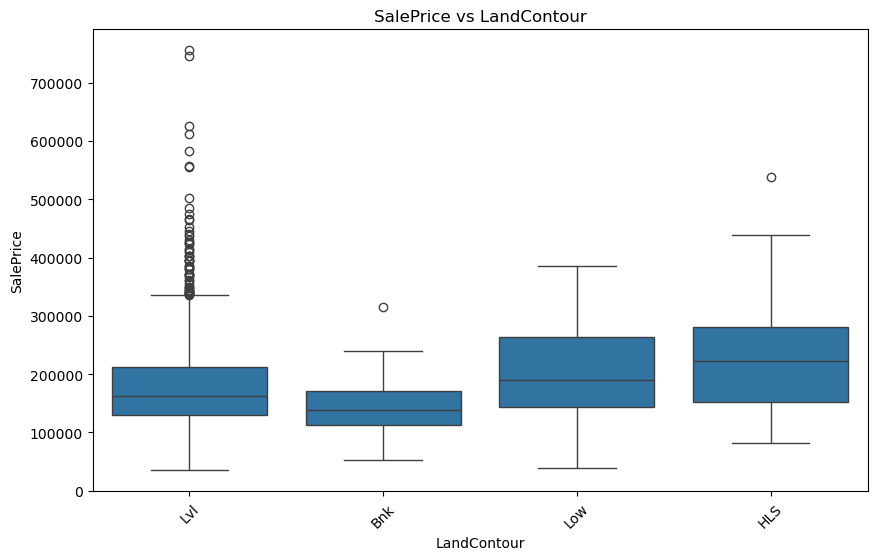

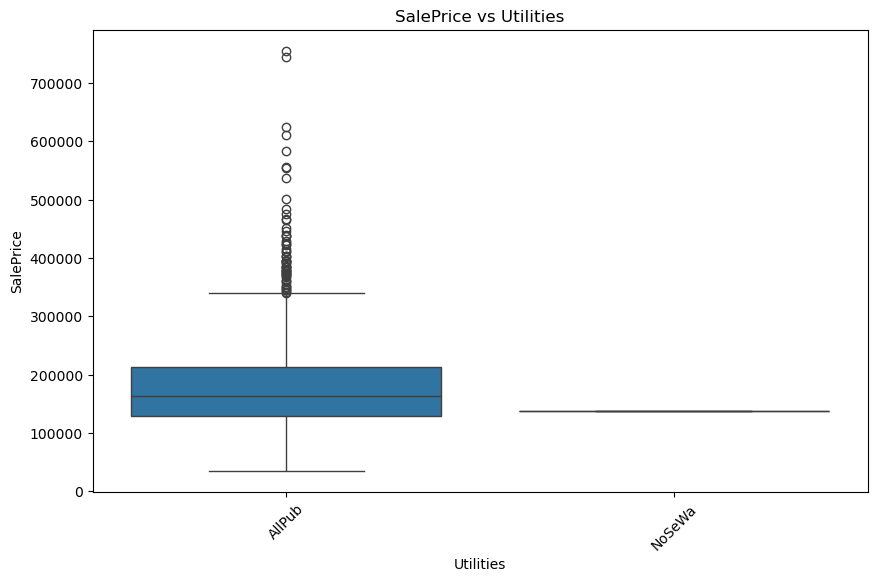

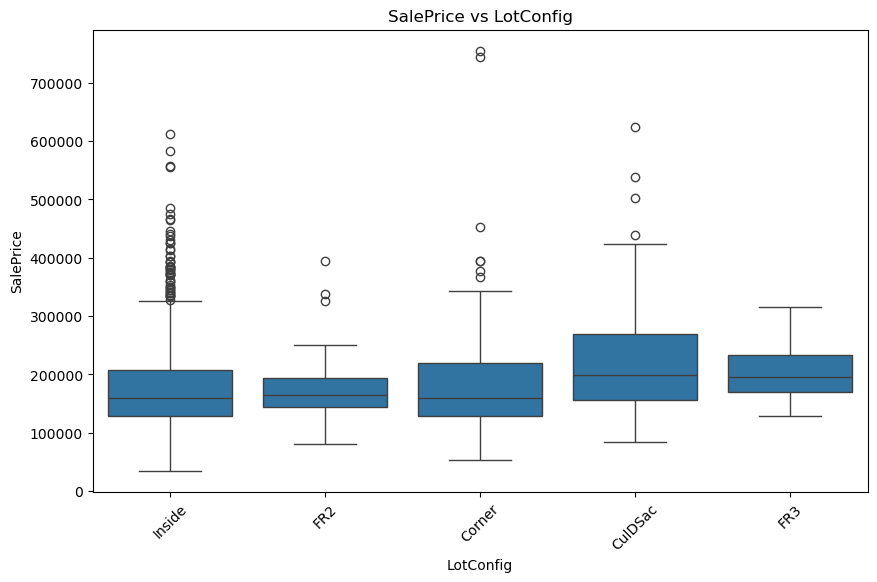

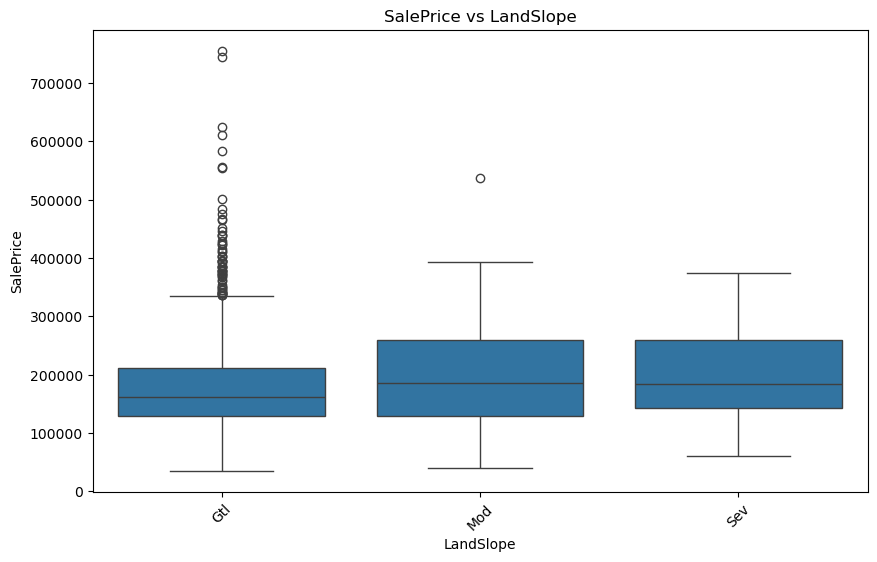

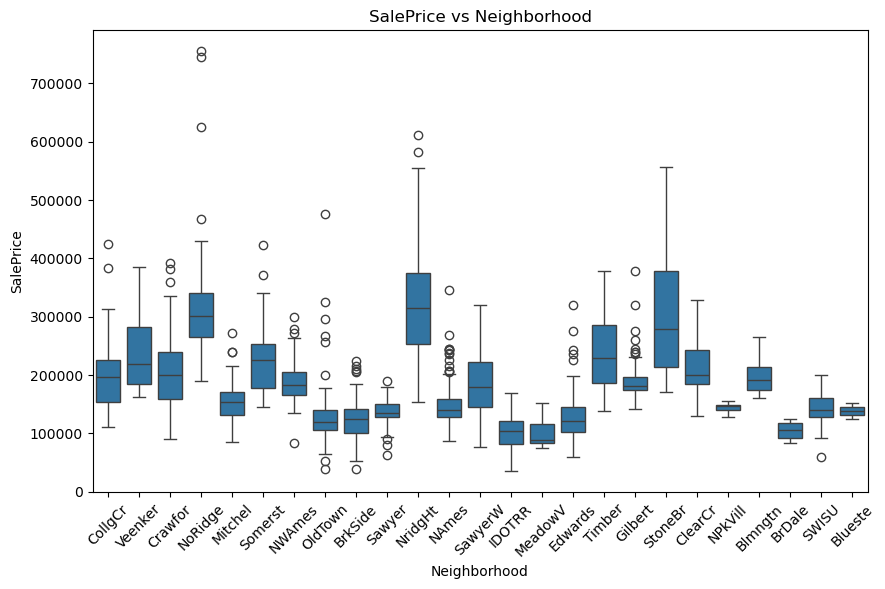

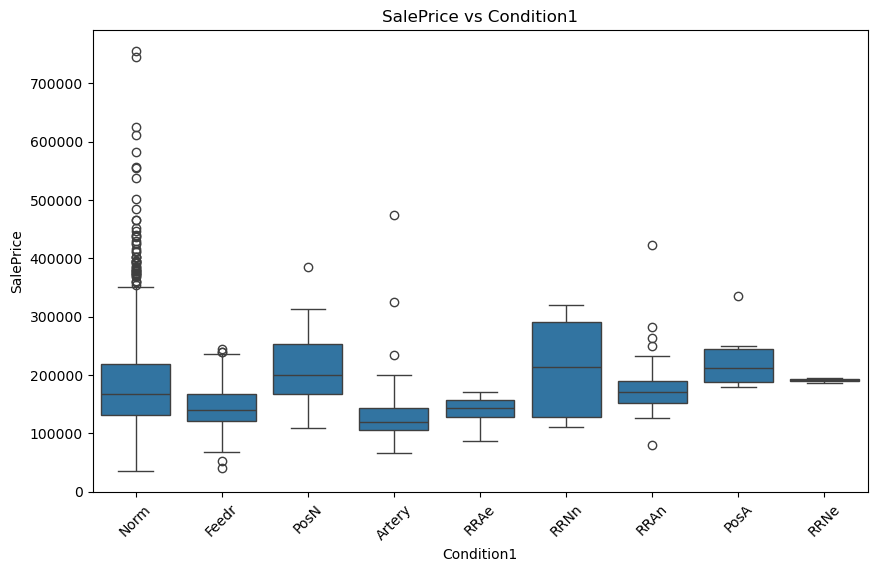

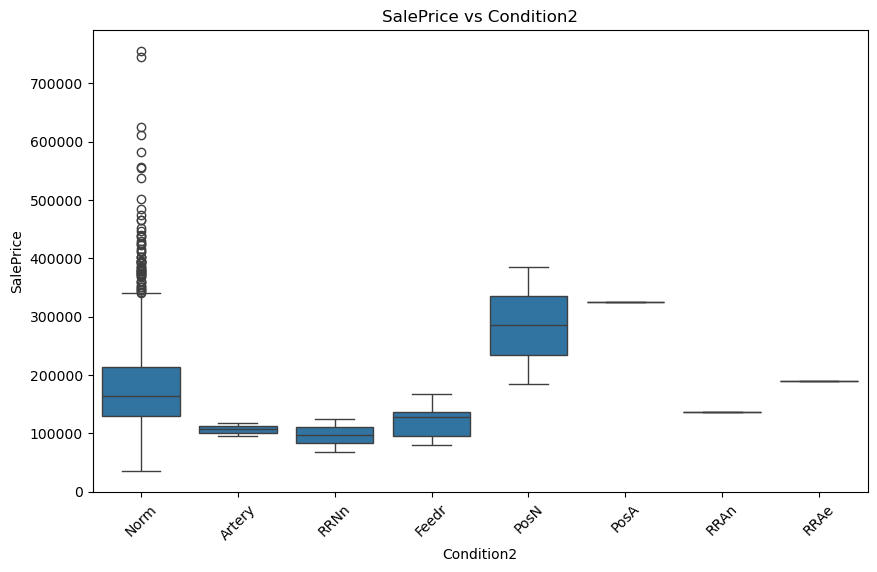

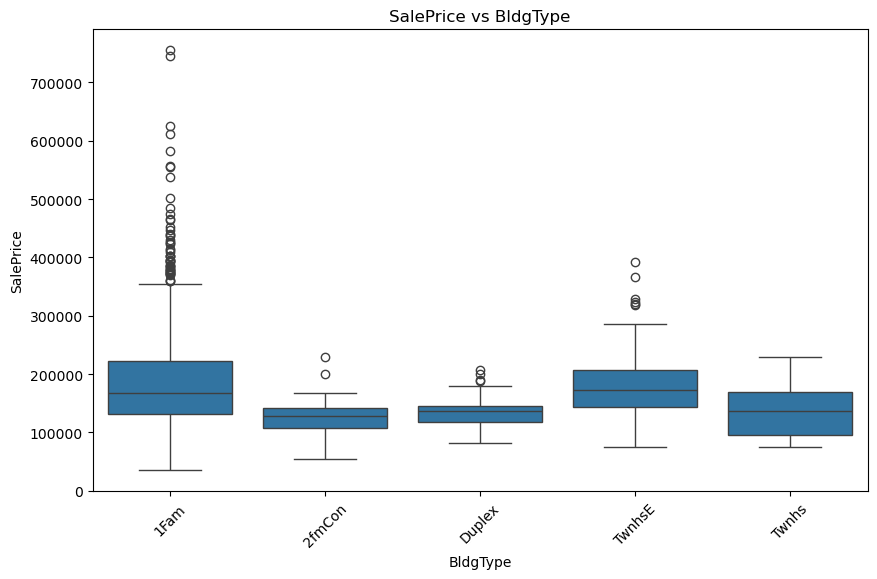

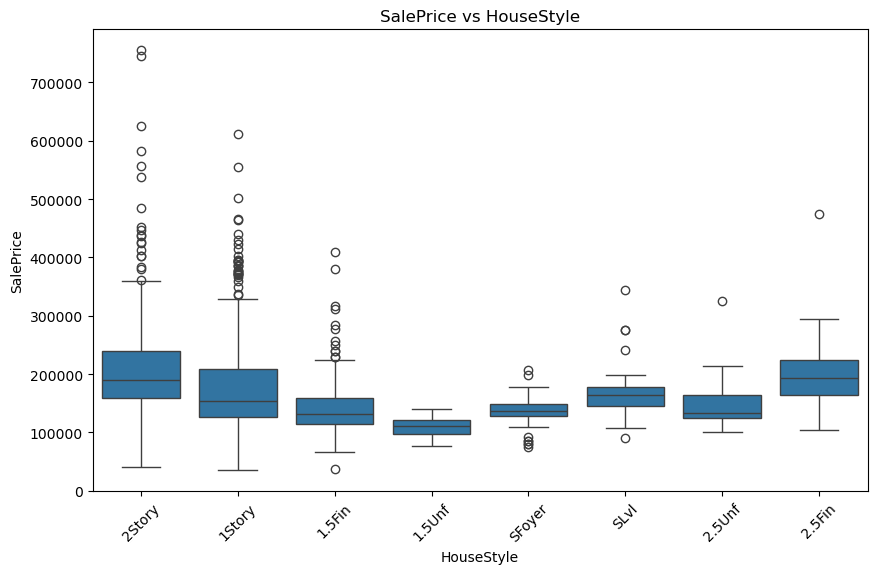

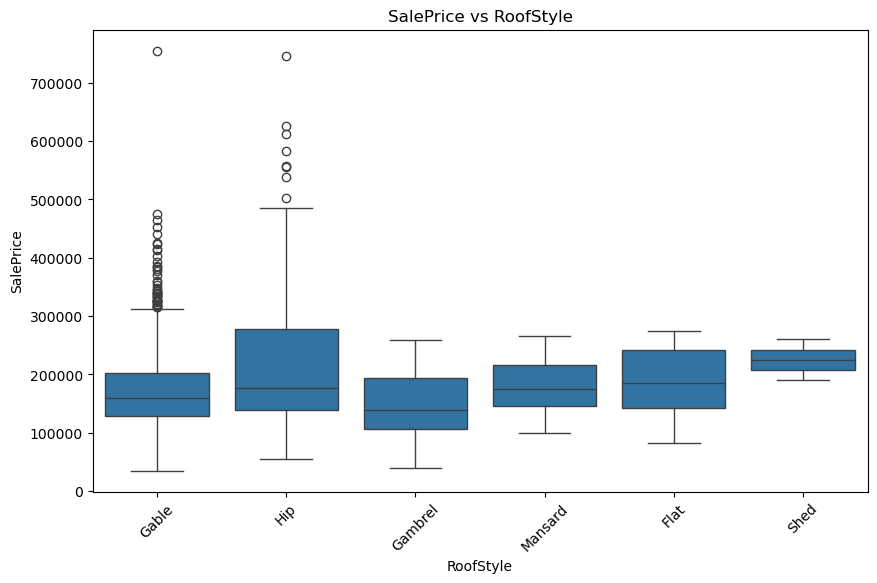

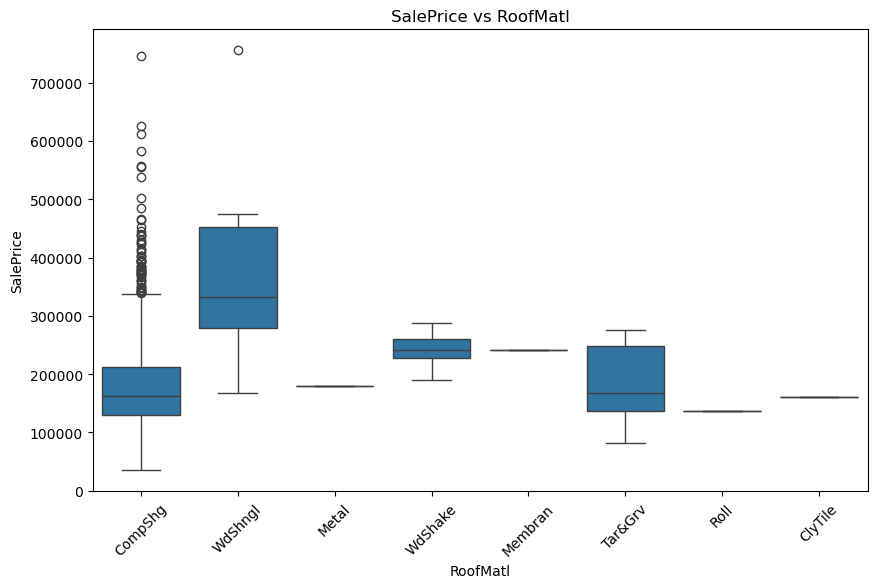

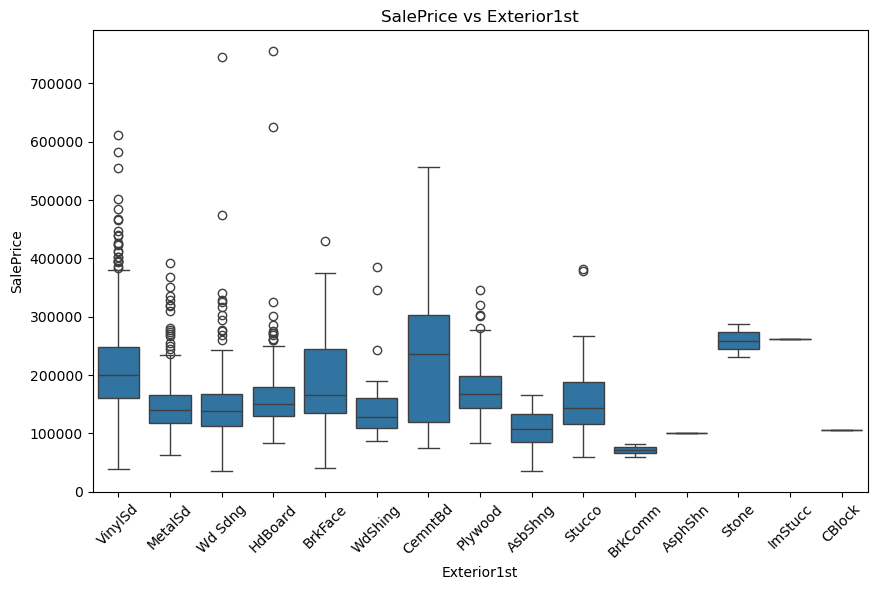

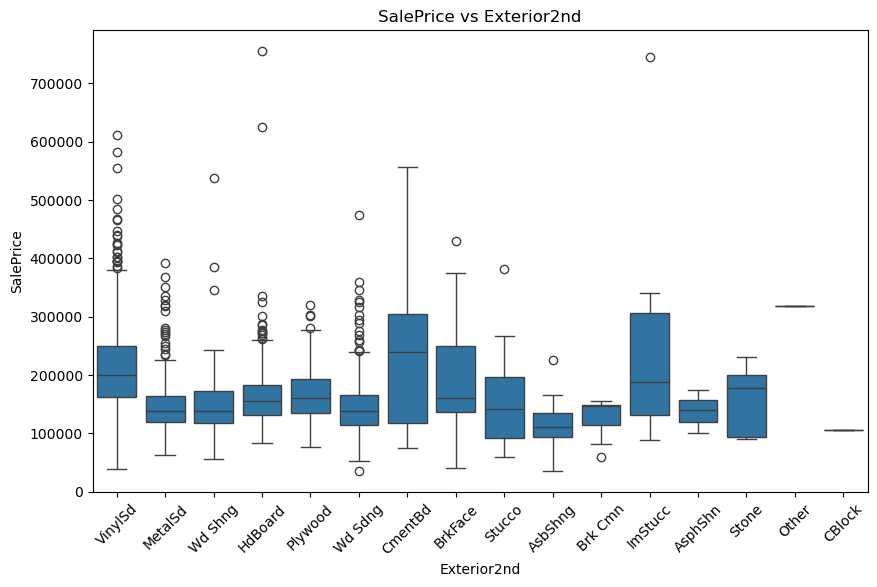

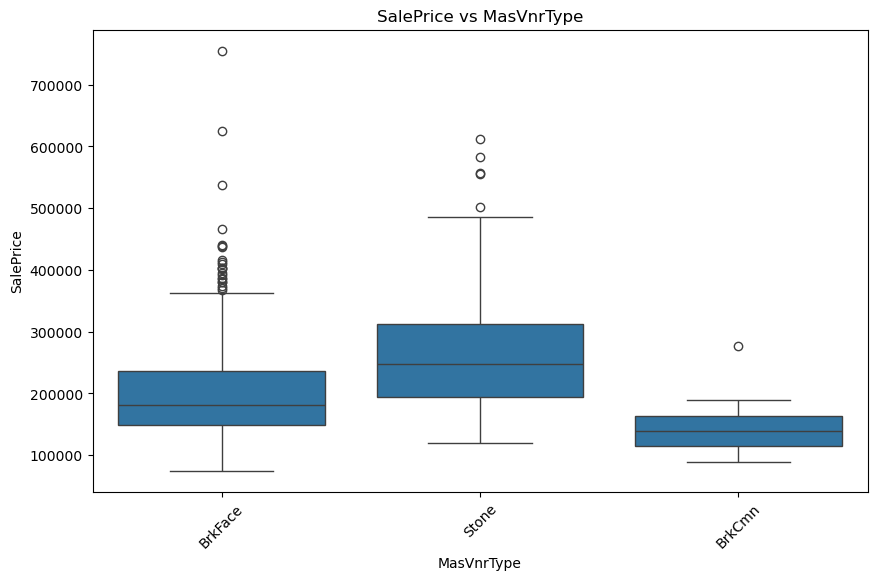

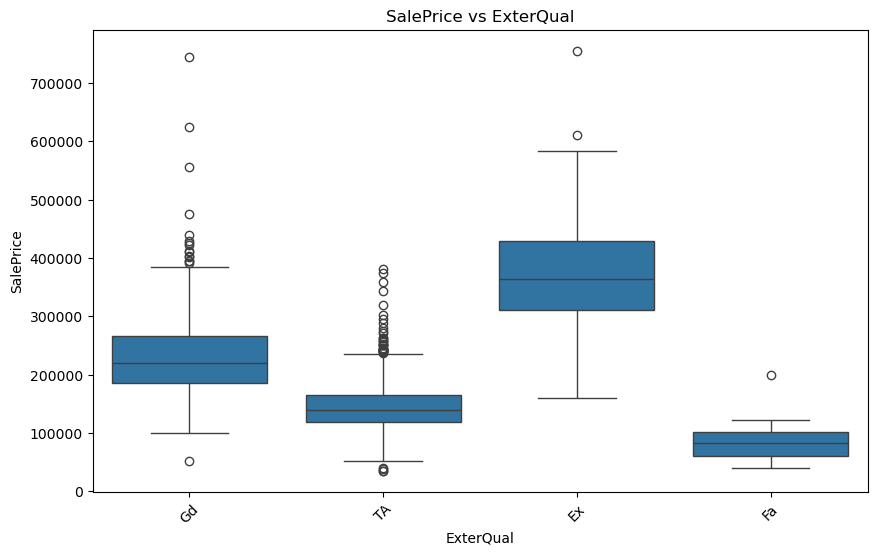

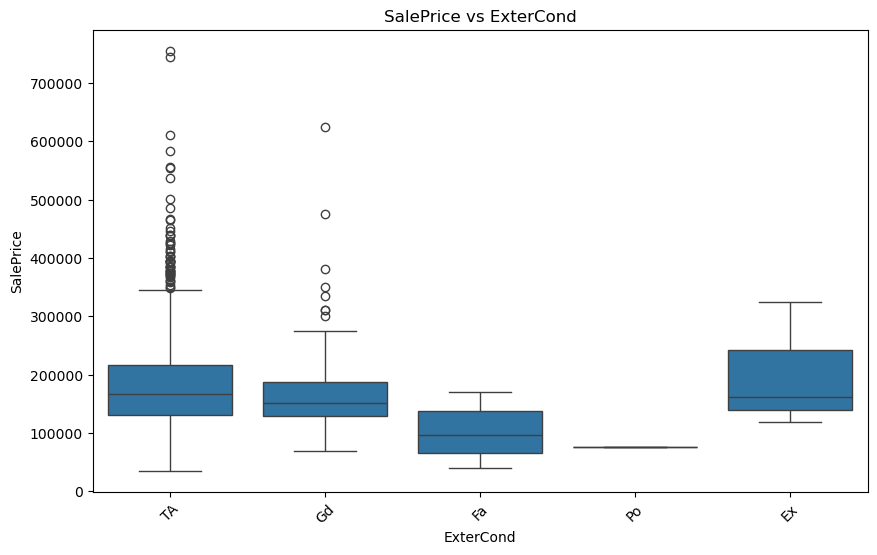

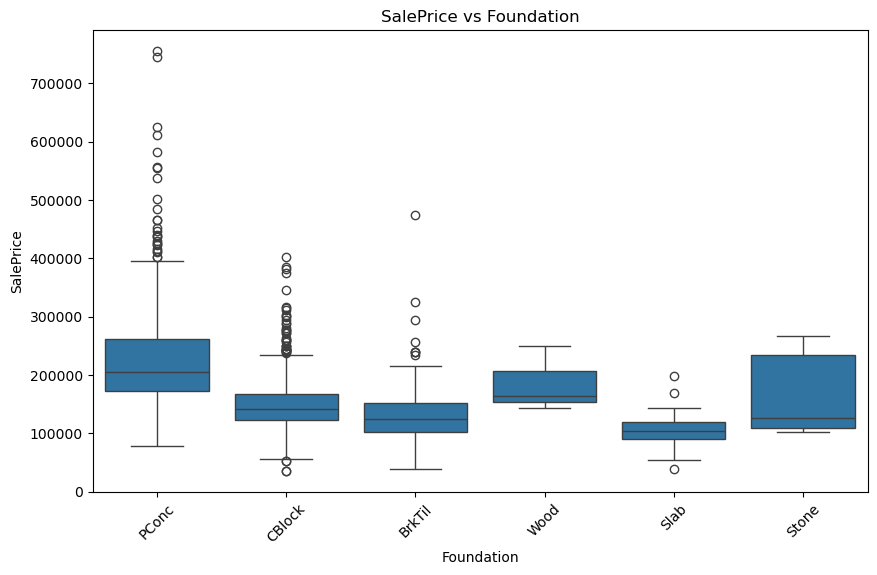

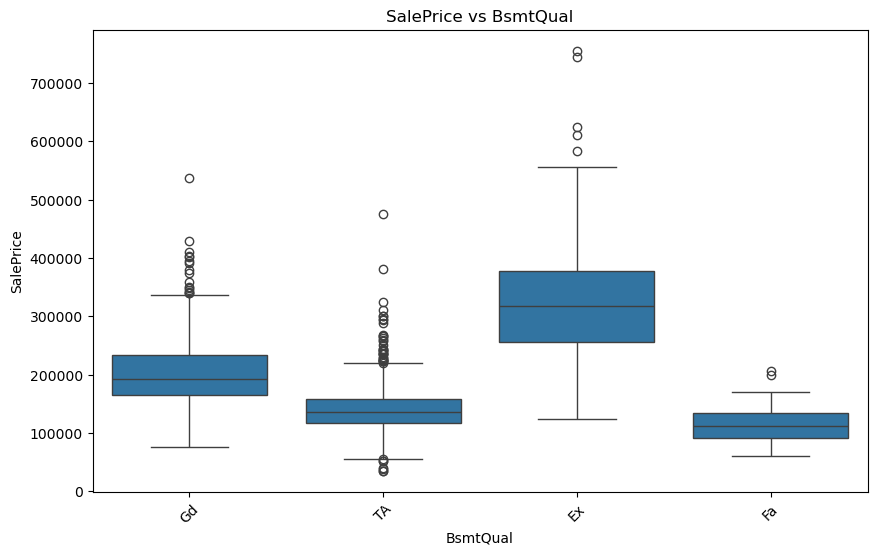

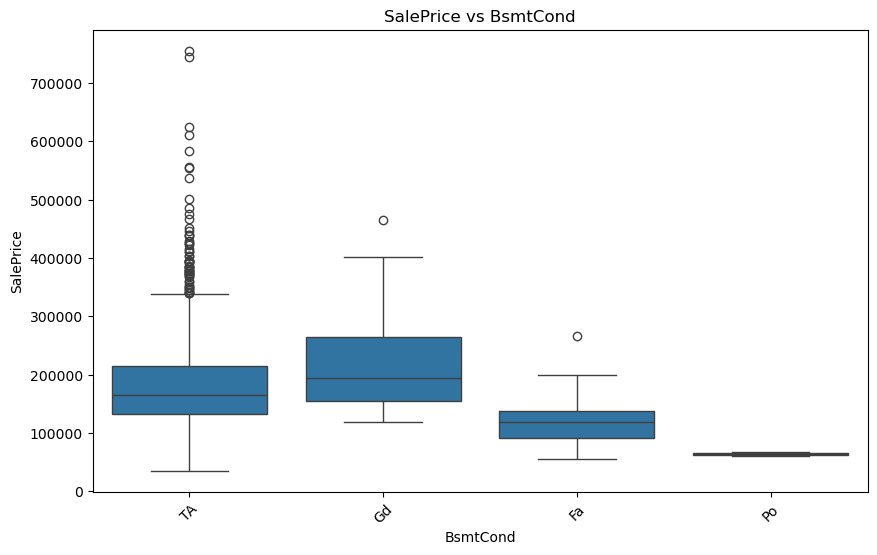

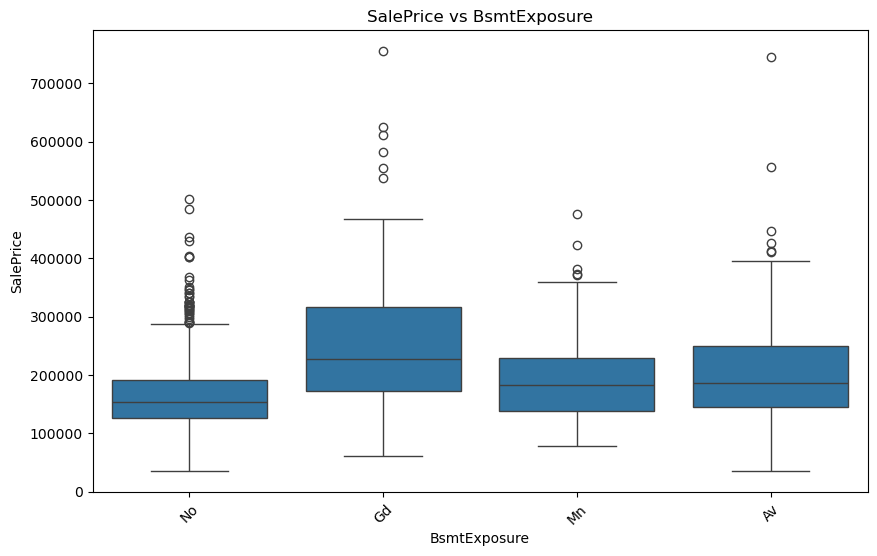

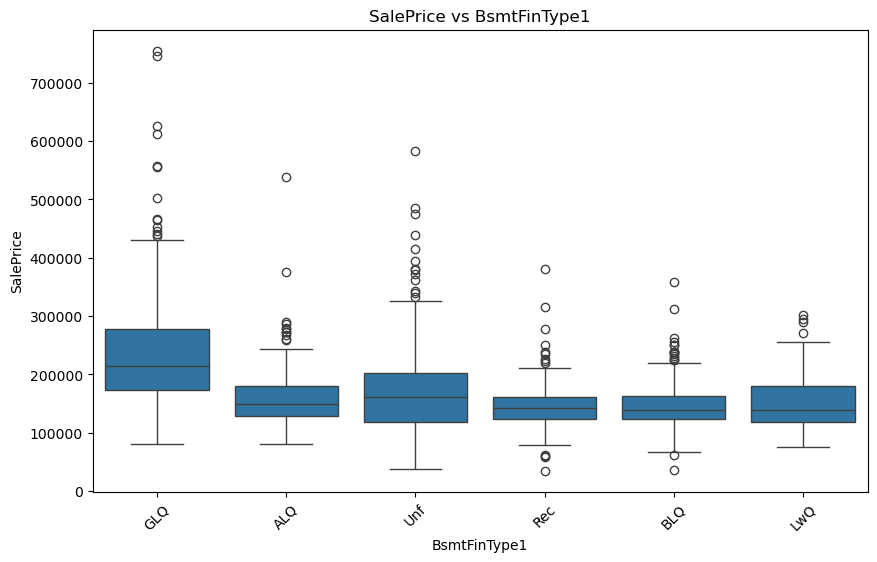

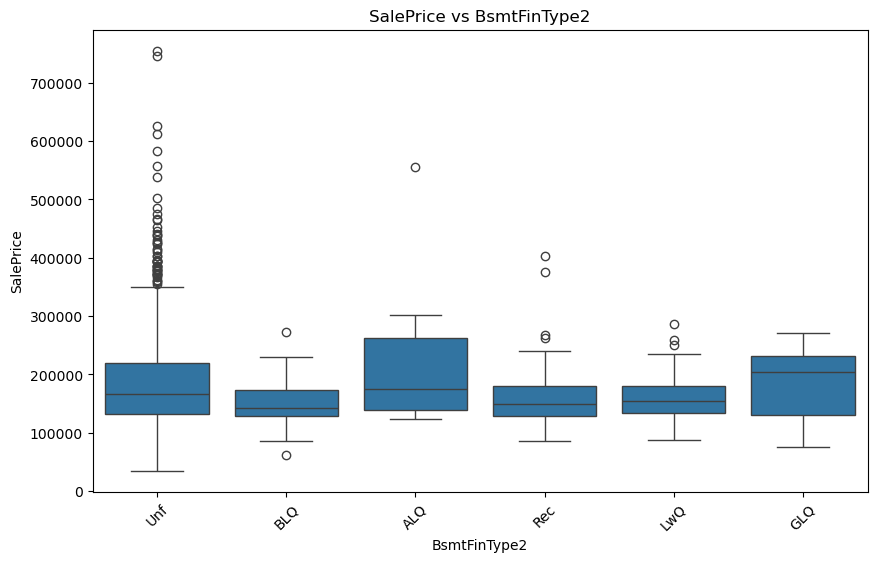

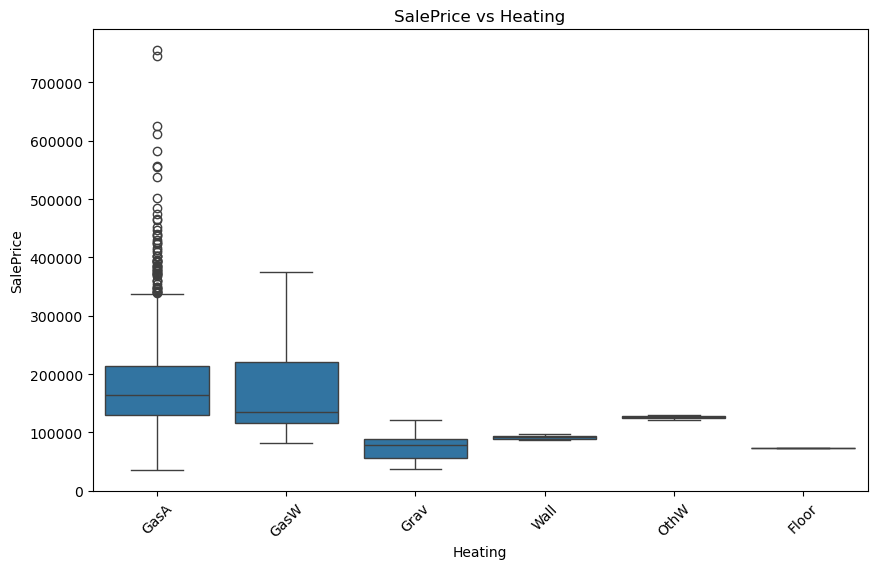

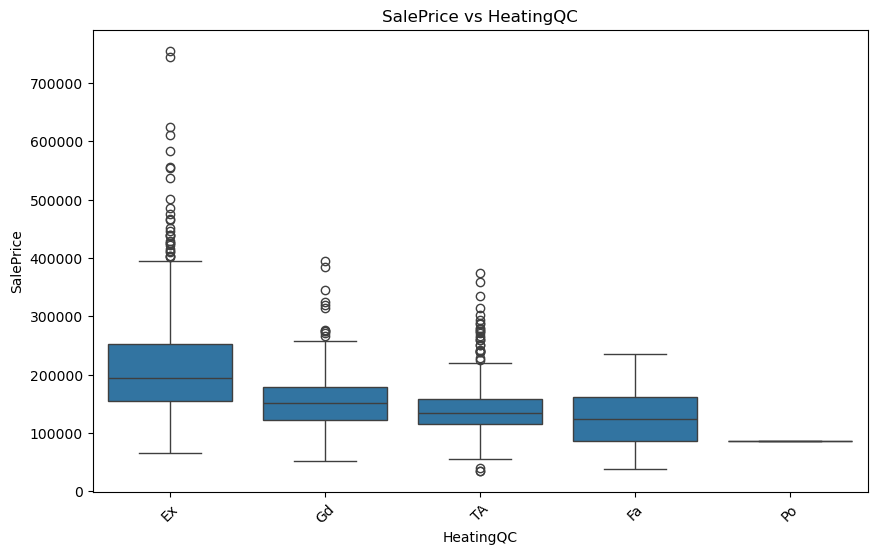

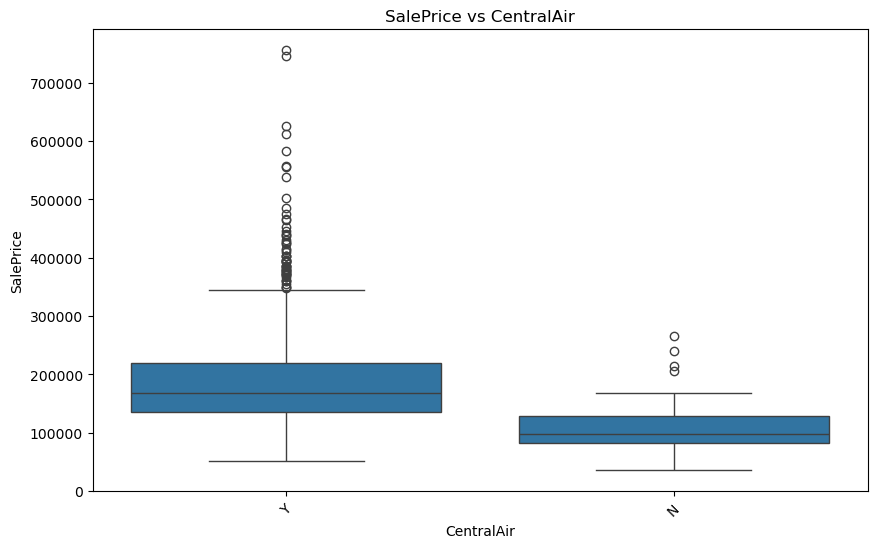

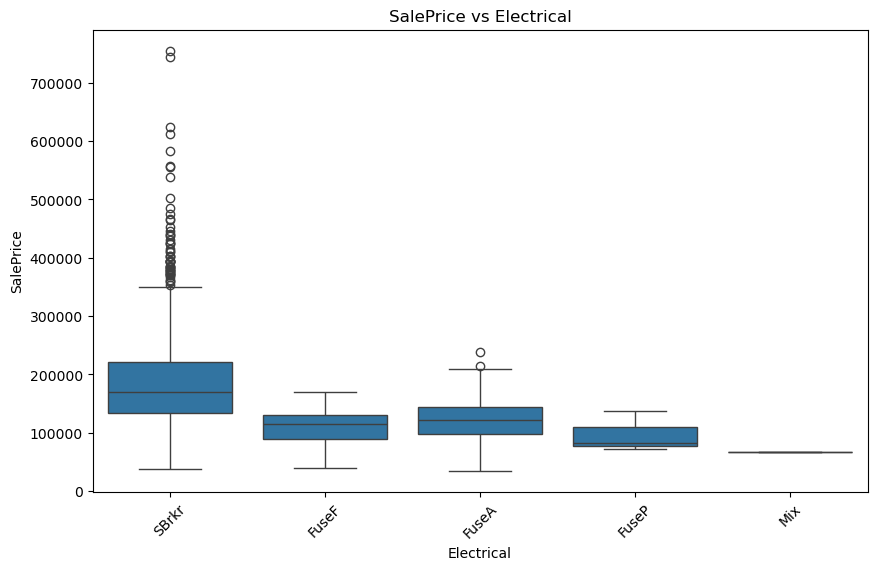

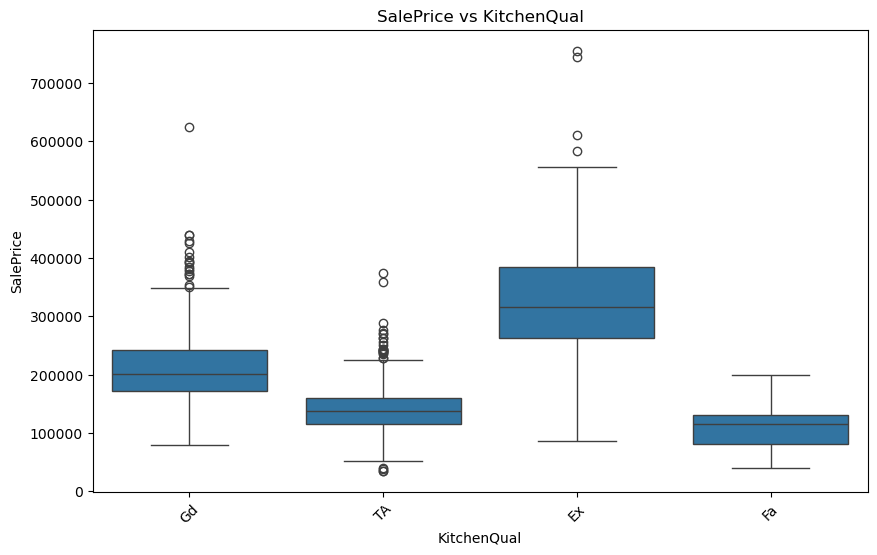

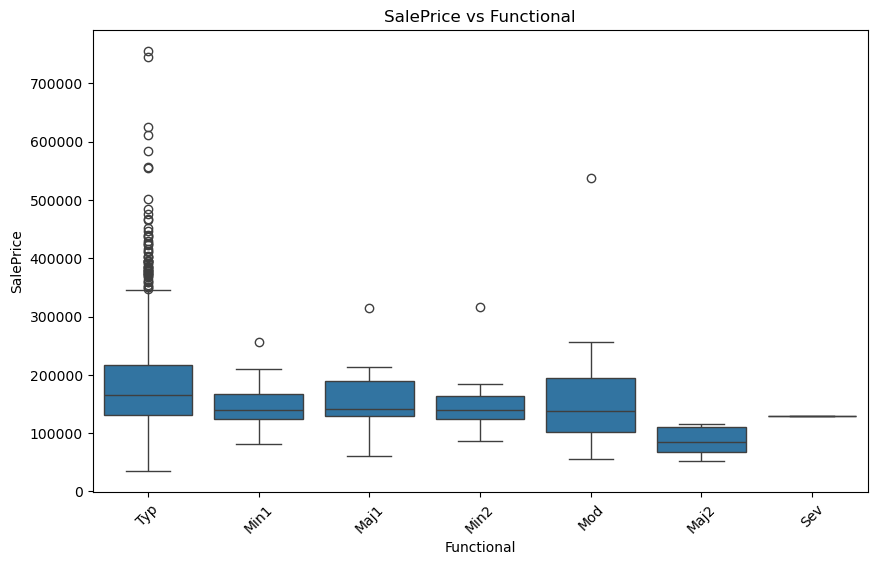

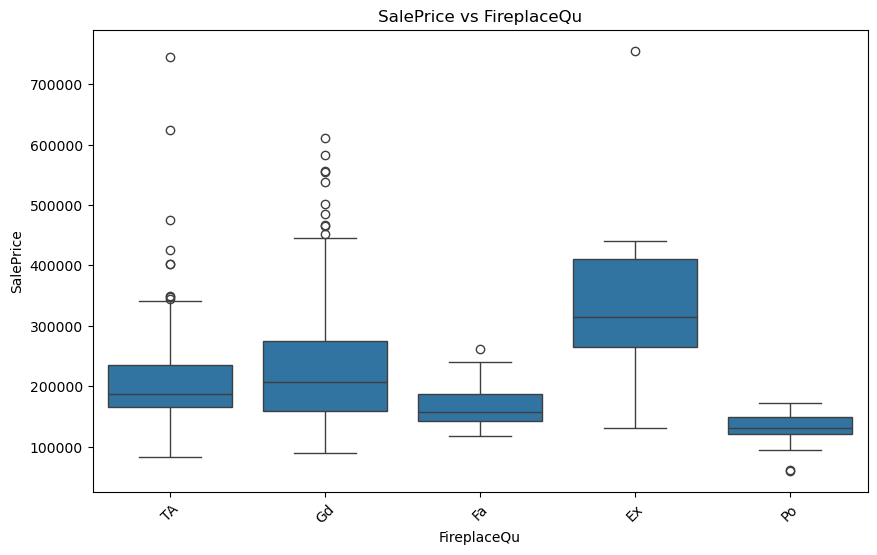

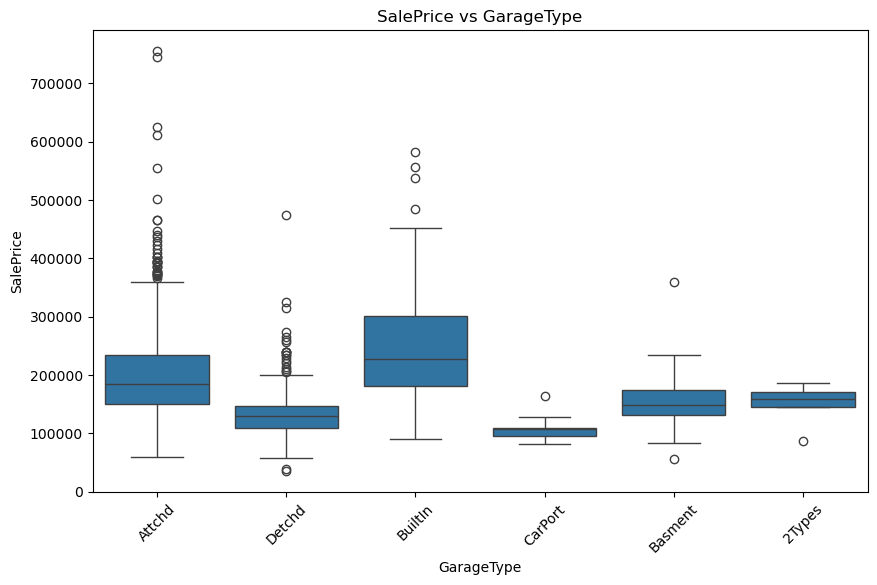

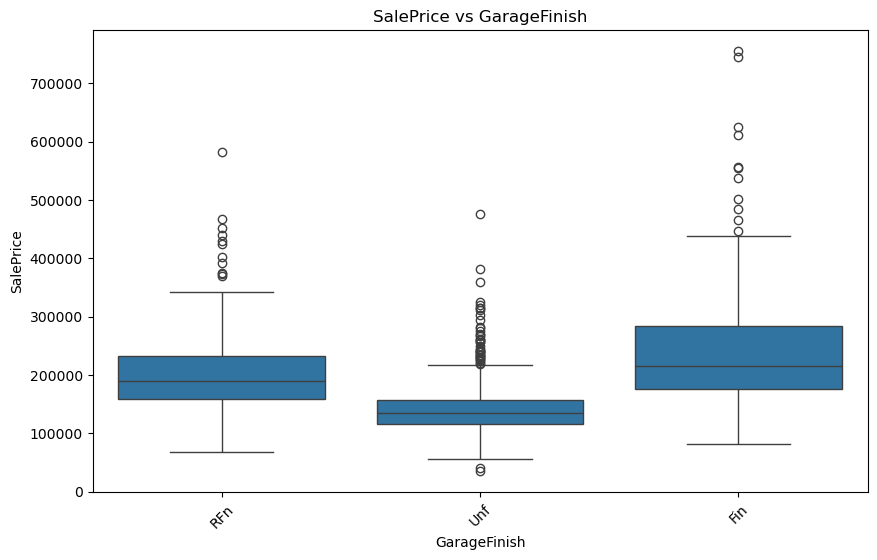

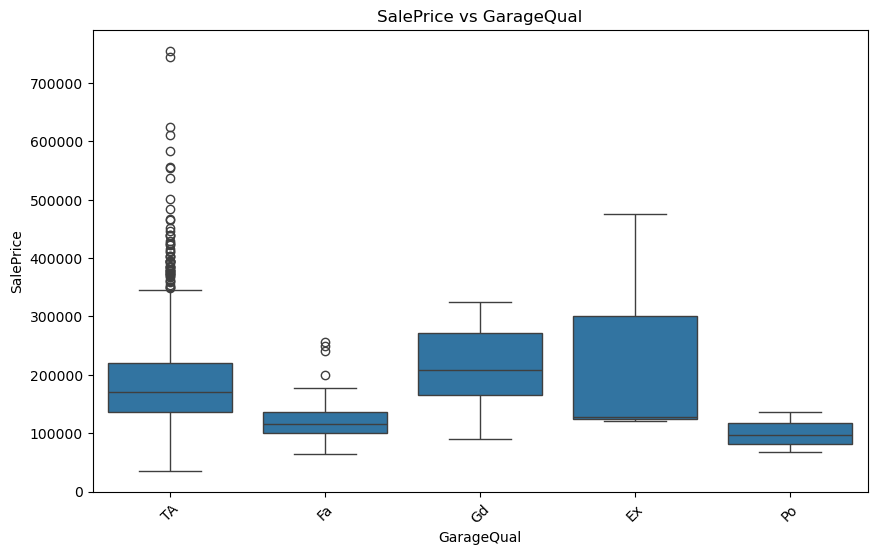

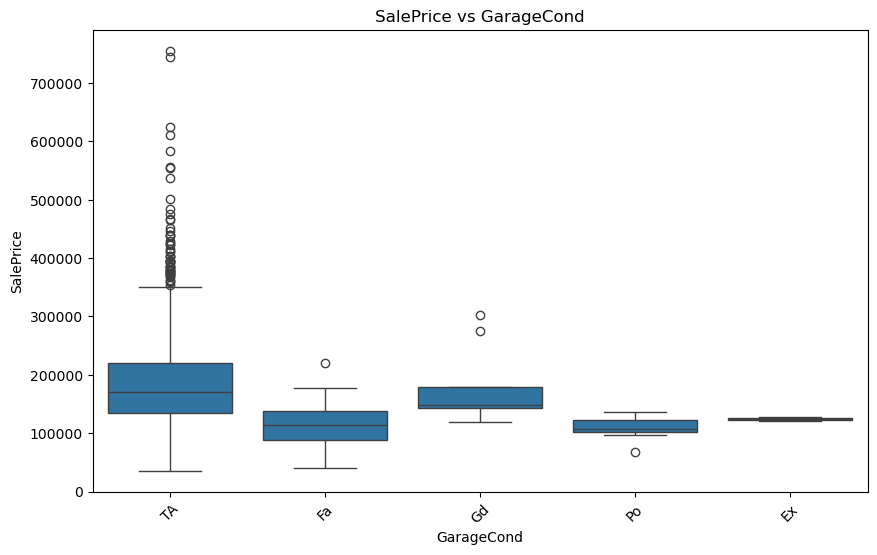

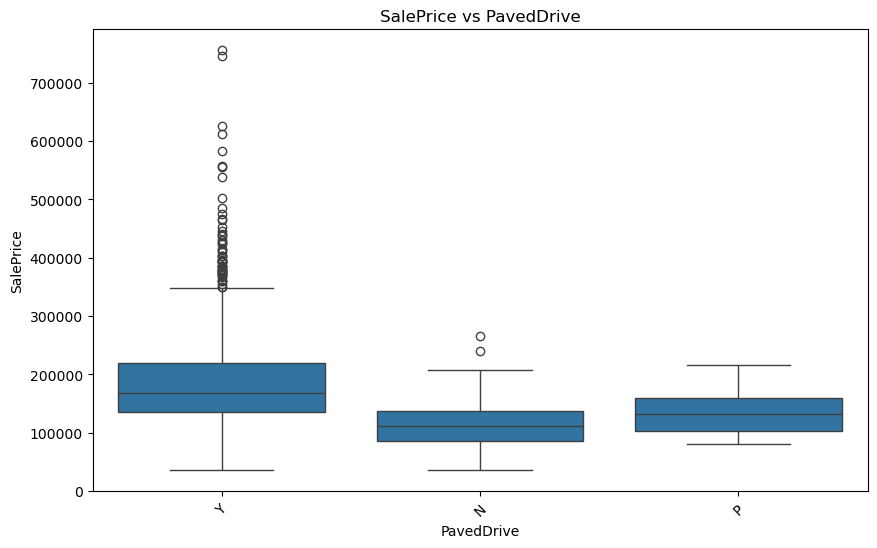

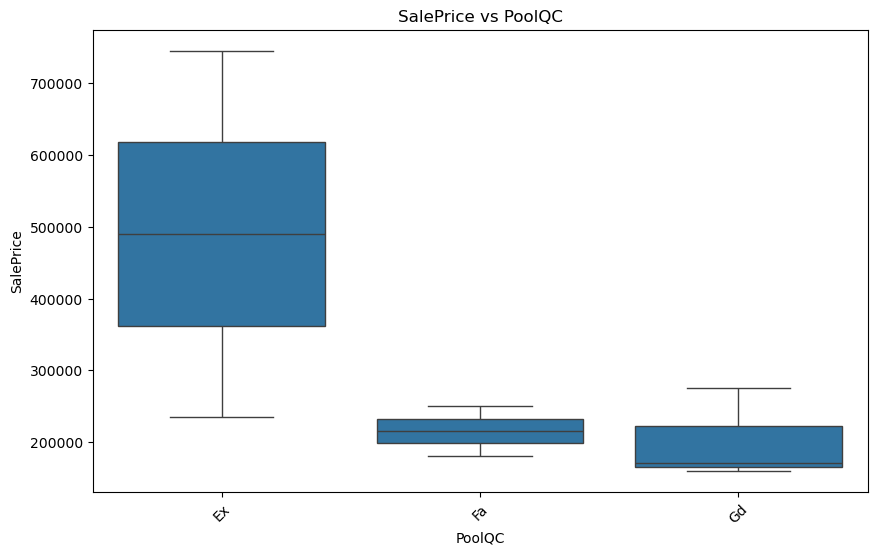

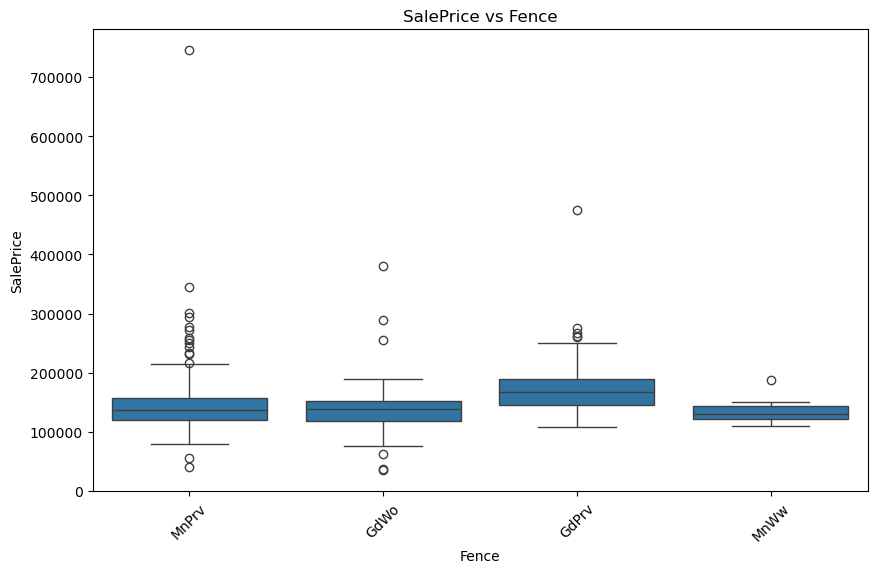

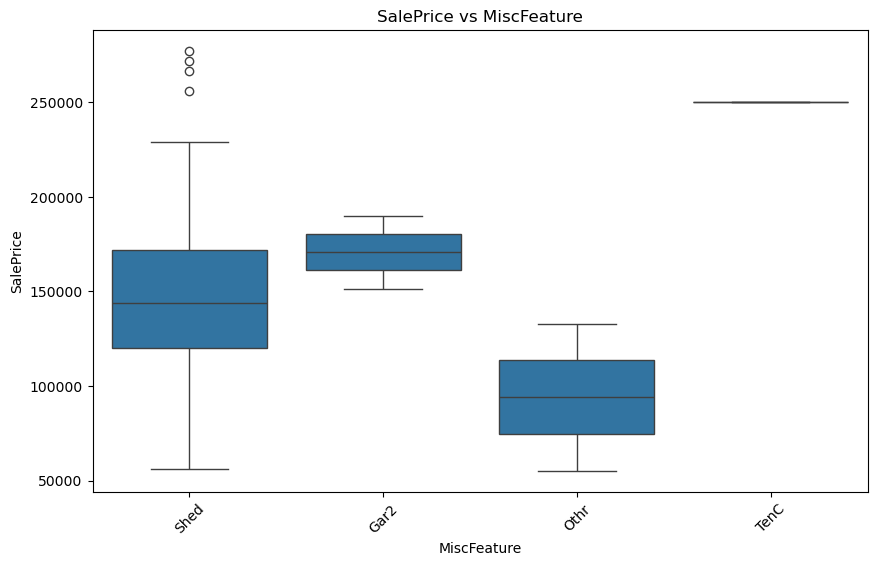

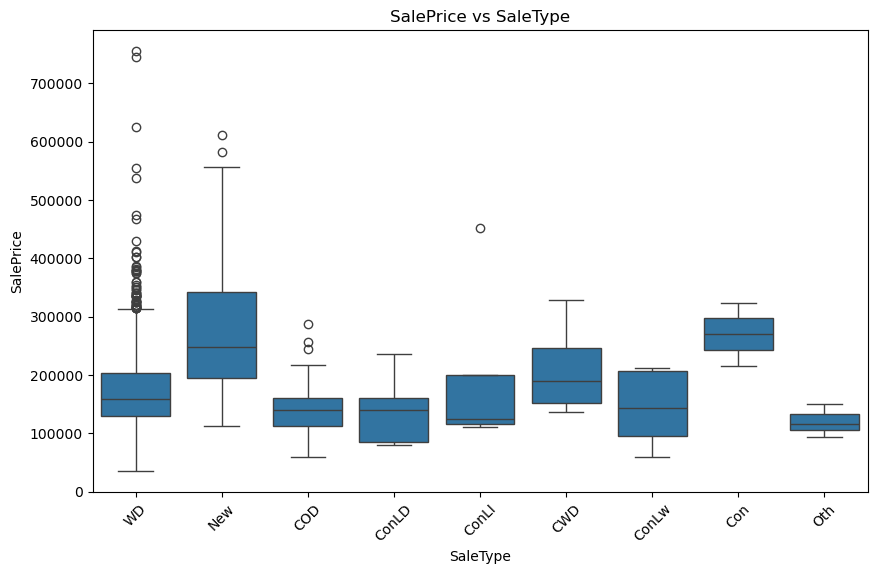

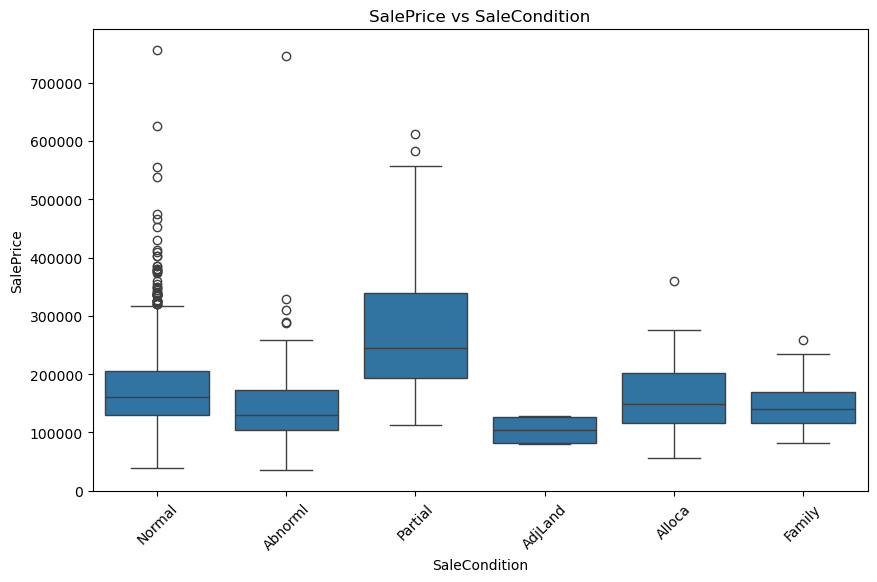

In [36]:
categorical_features = df_train.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=feature, y='SalePrice', data=df_train)
    plt.title(f'SalePrice vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

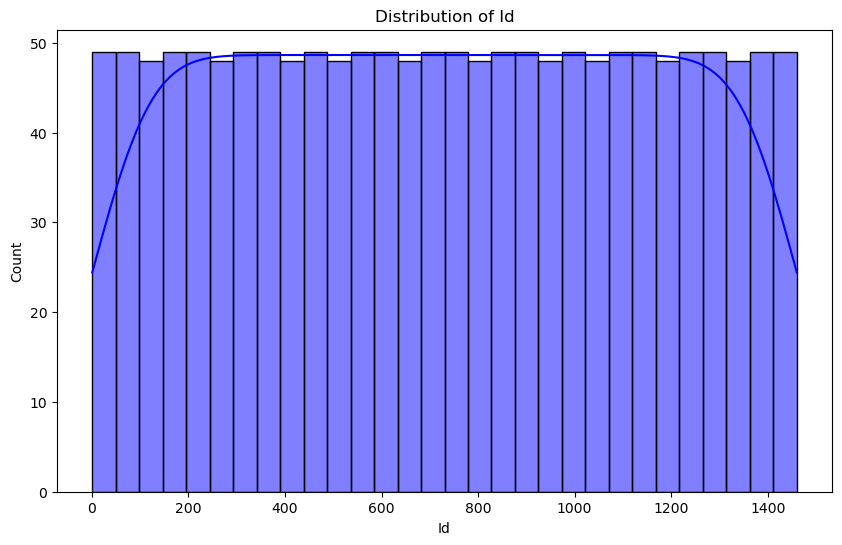

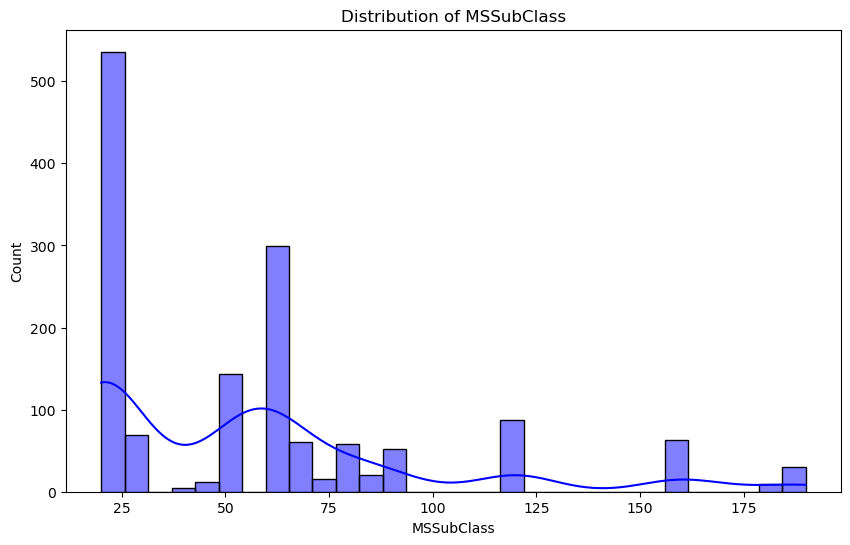

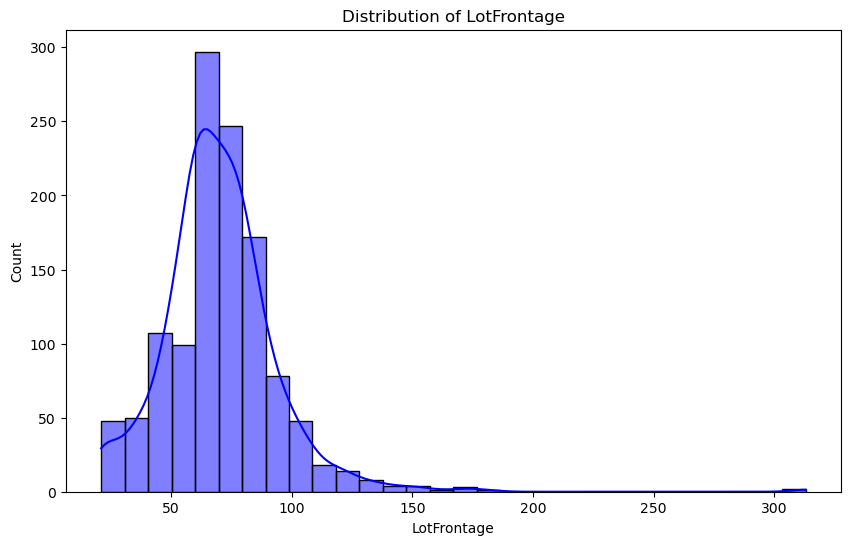

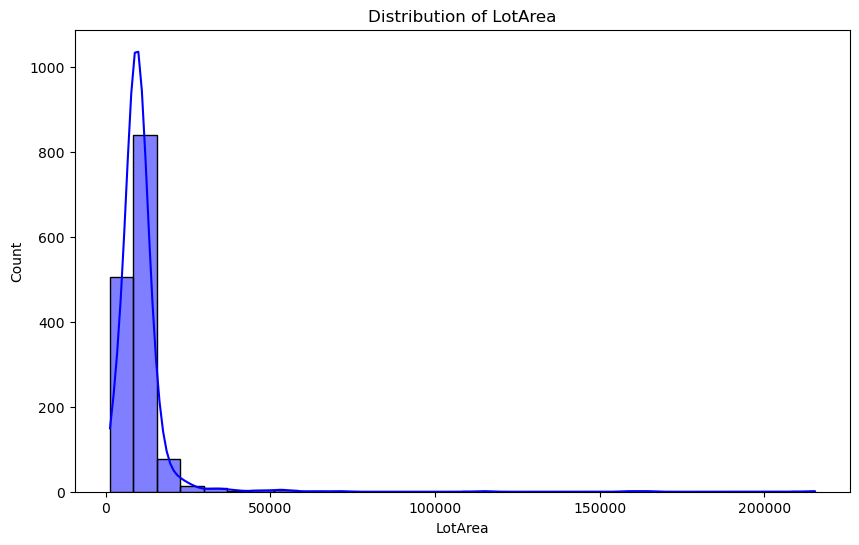

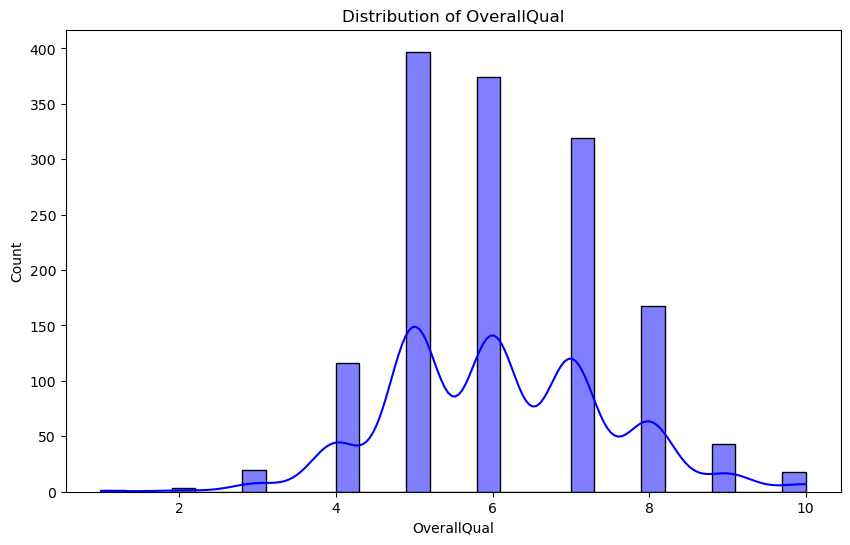

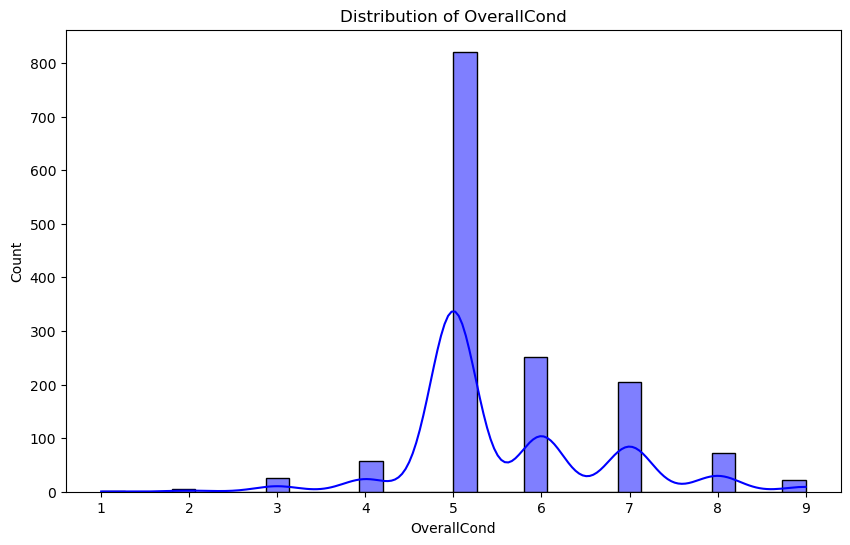

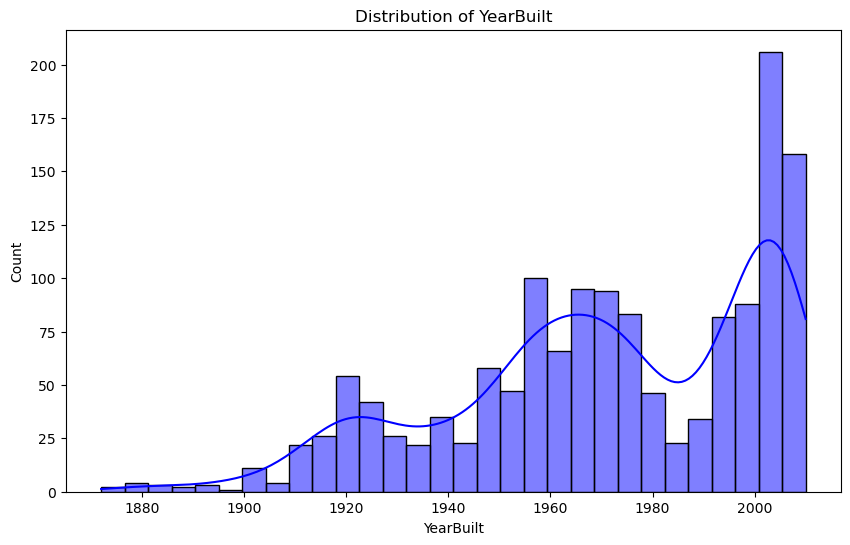

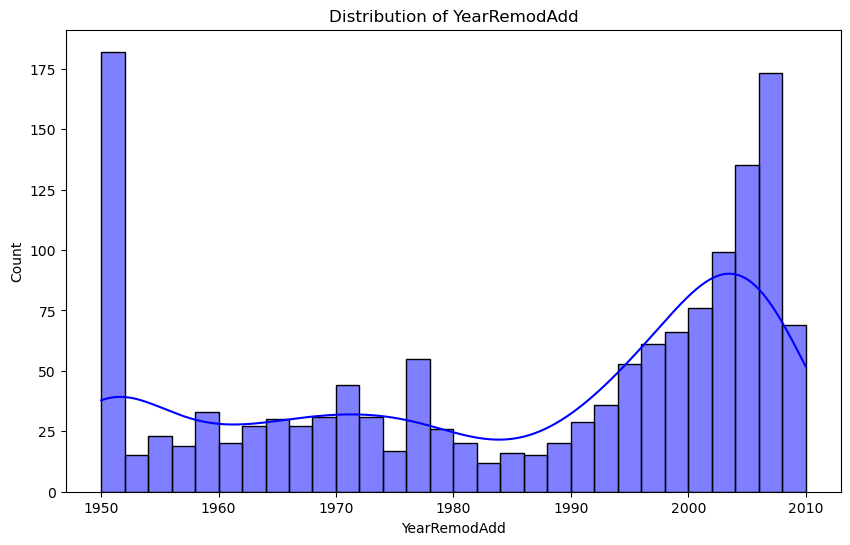

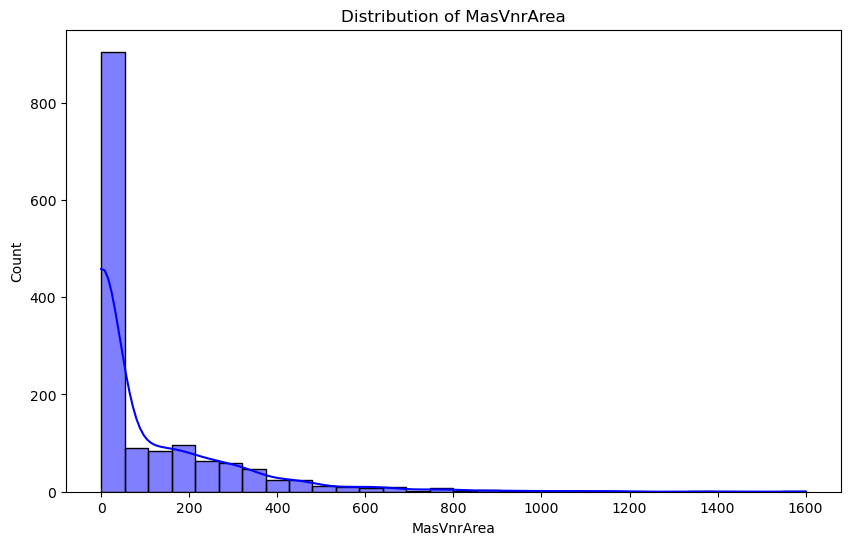

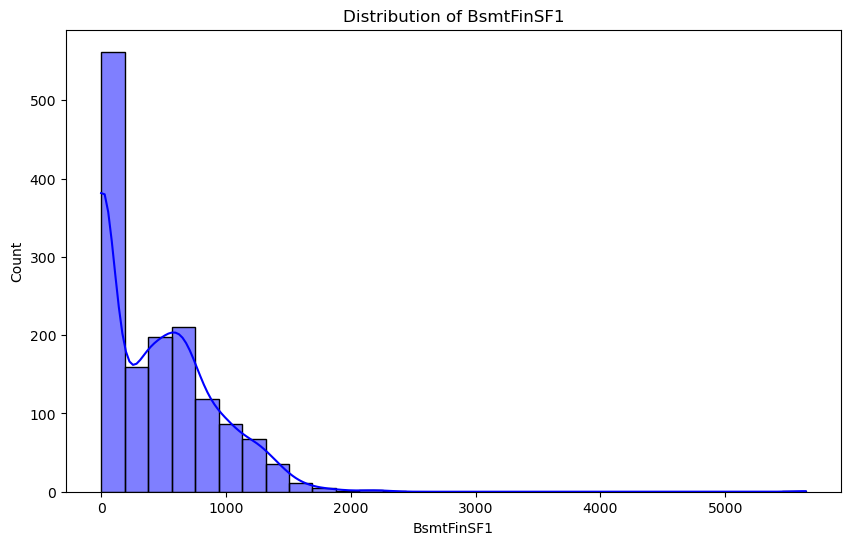

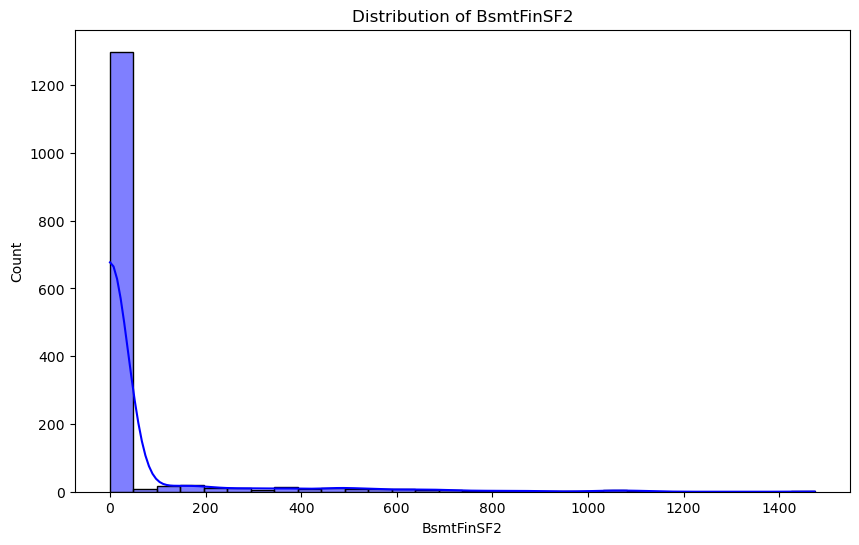

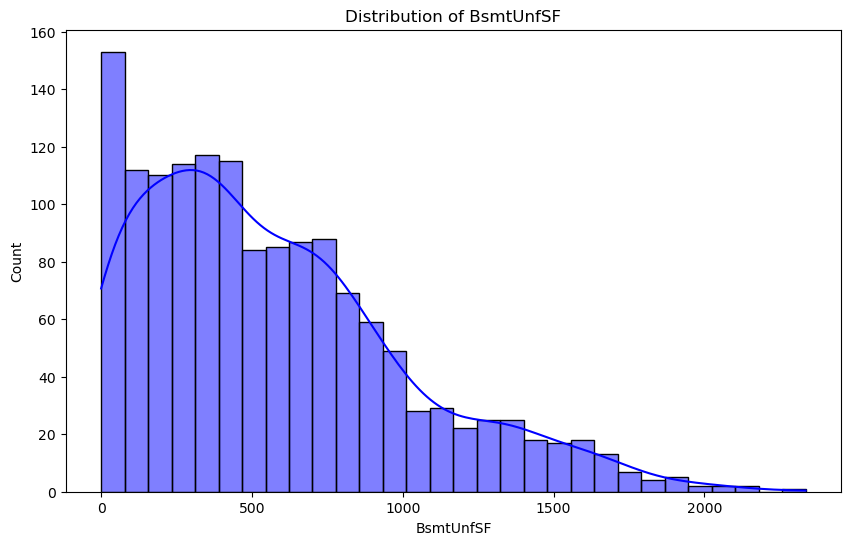

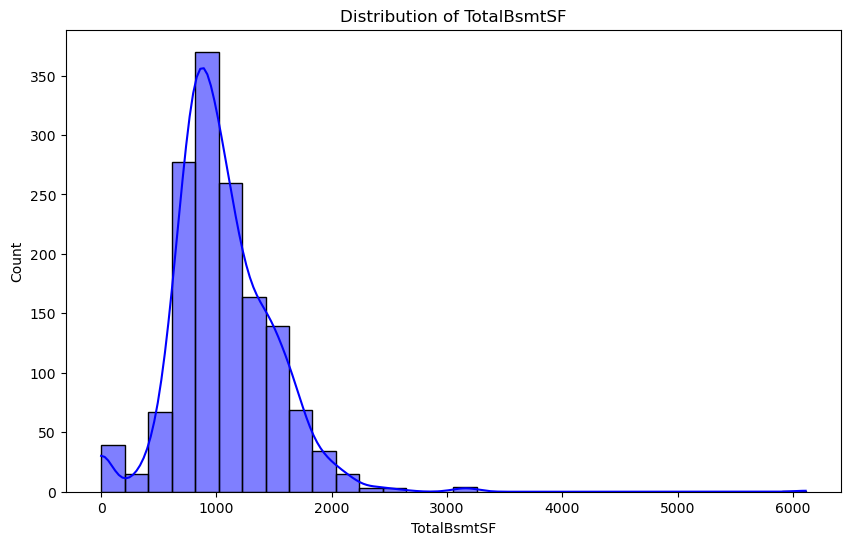

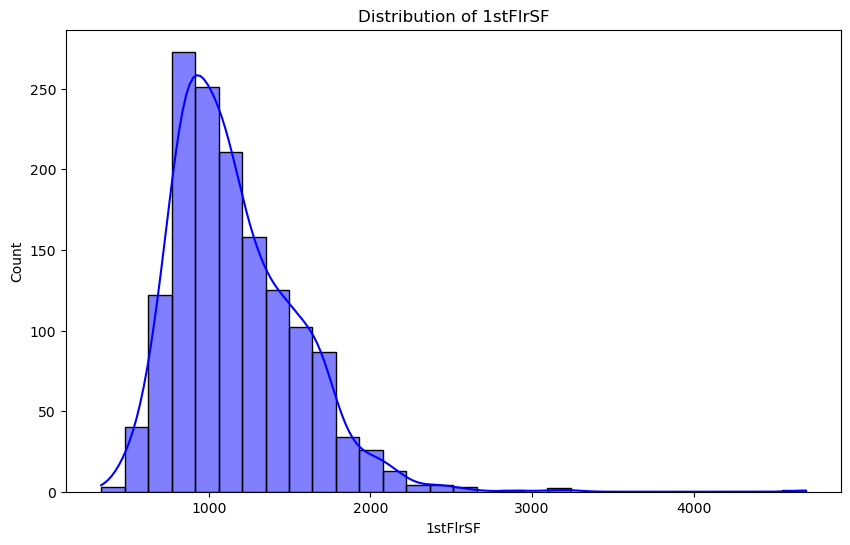

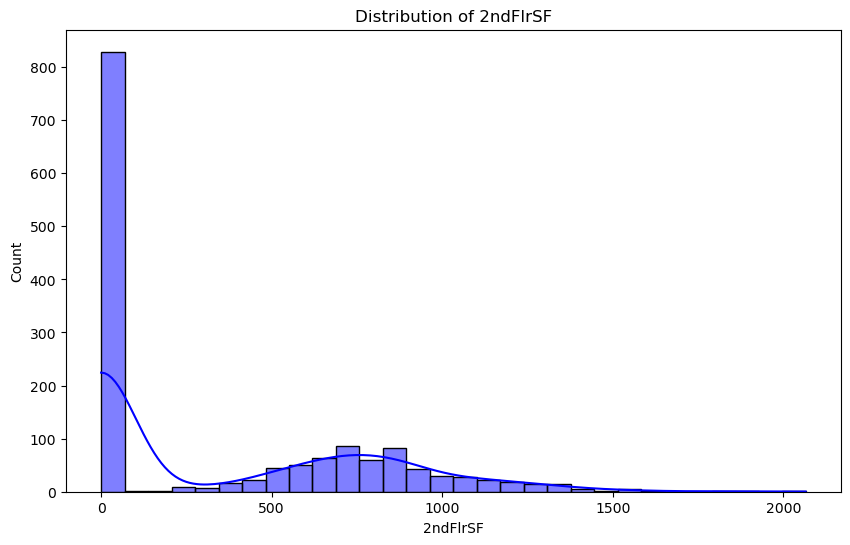

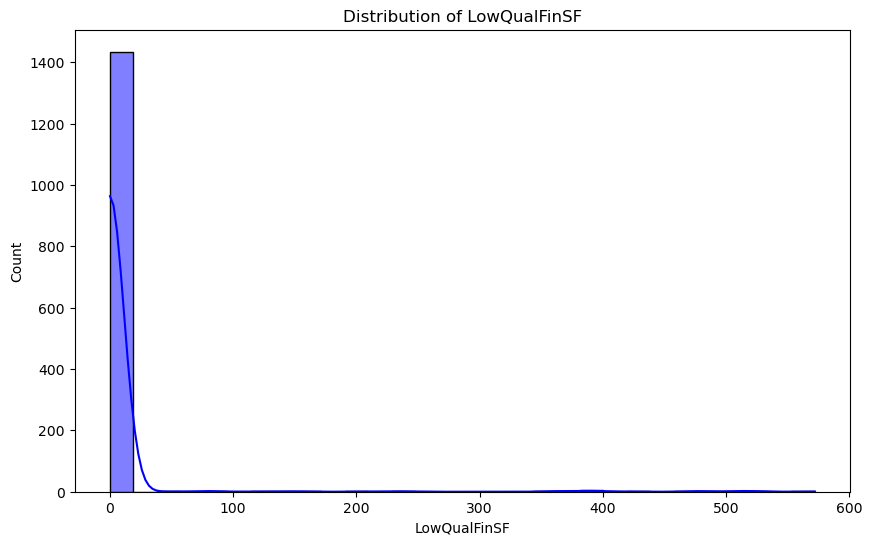

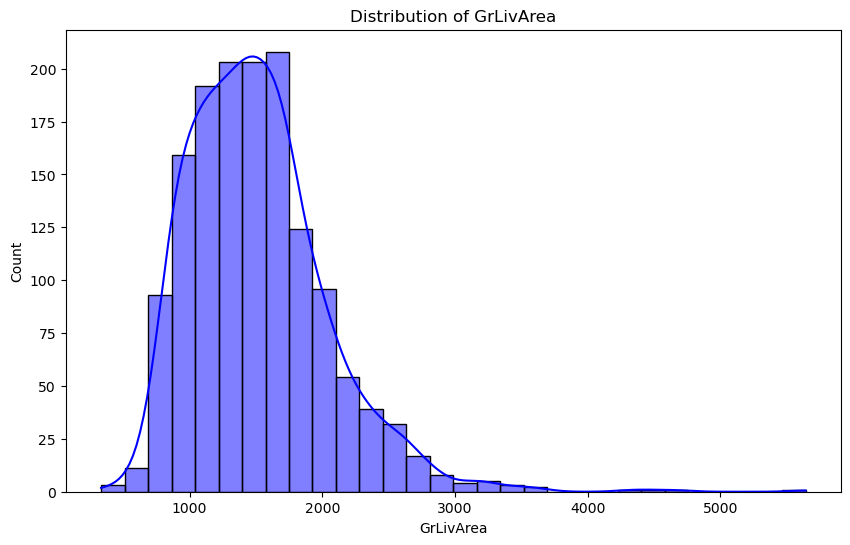

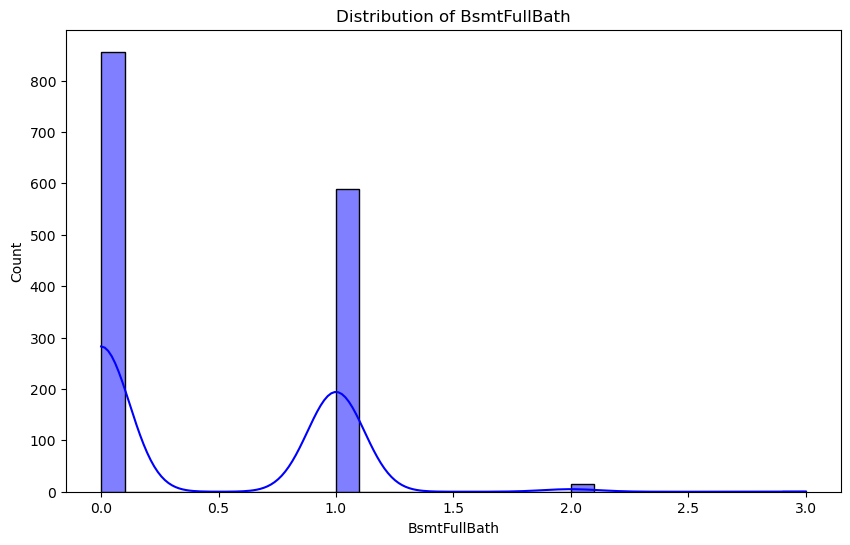

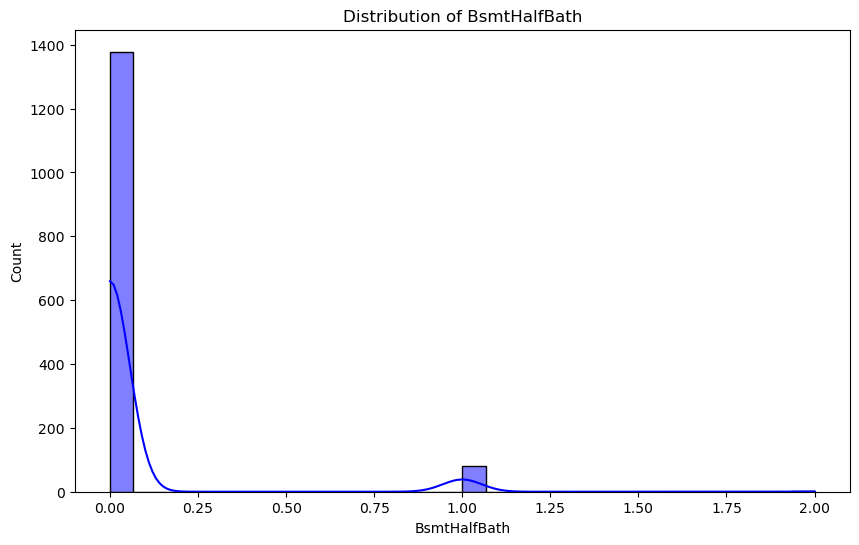

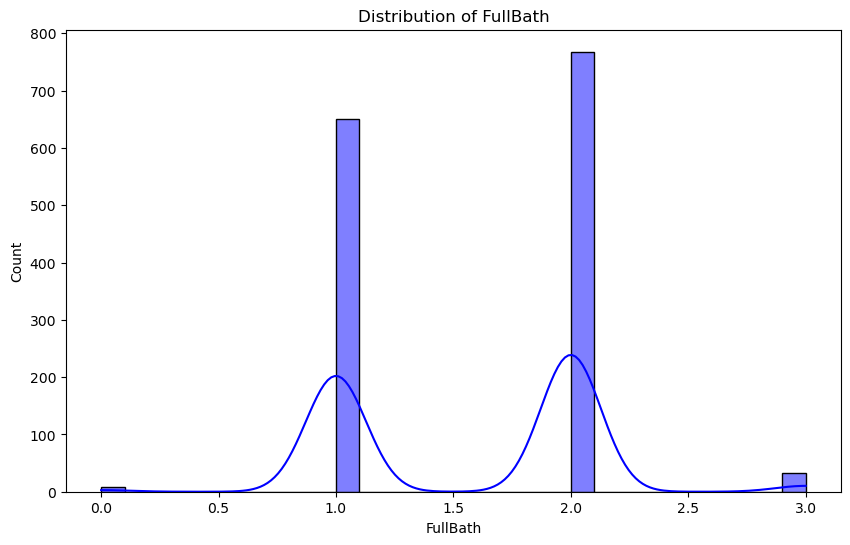

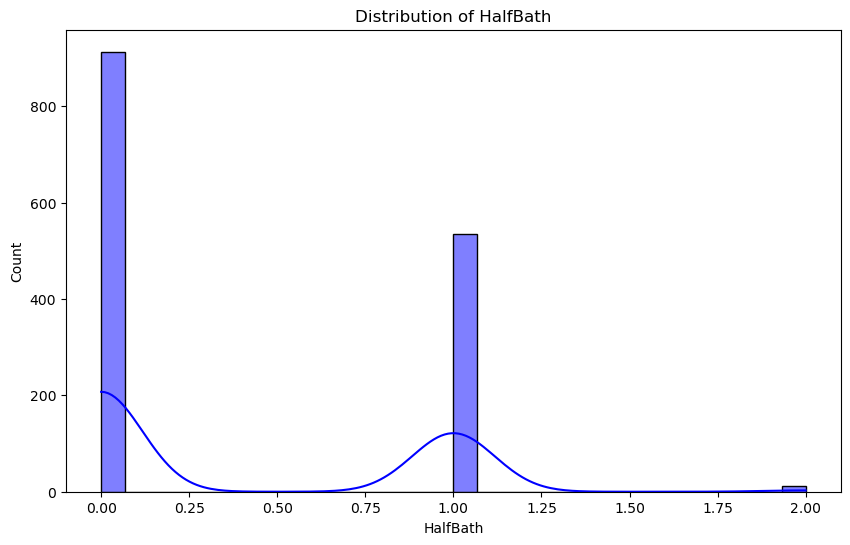

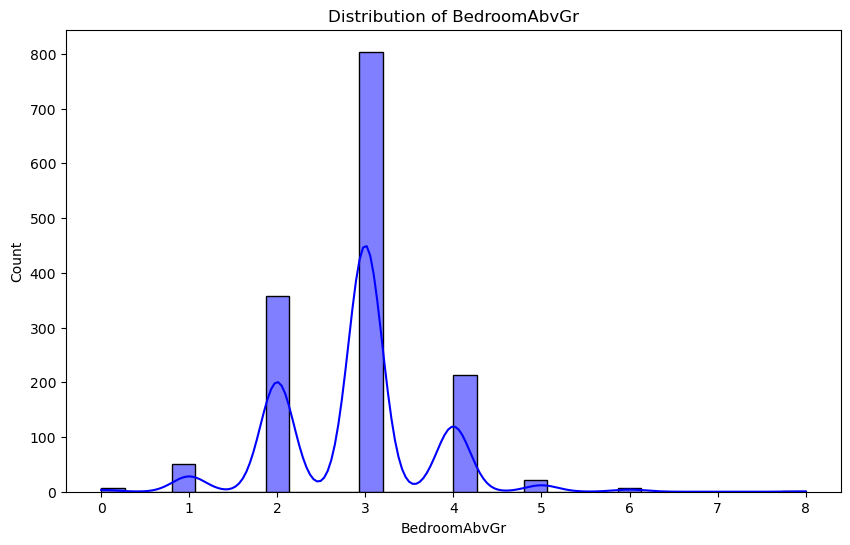

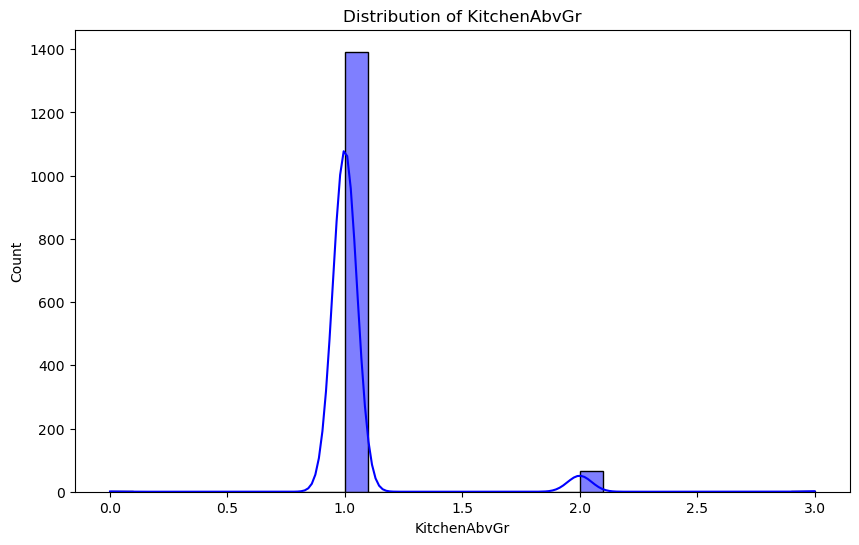

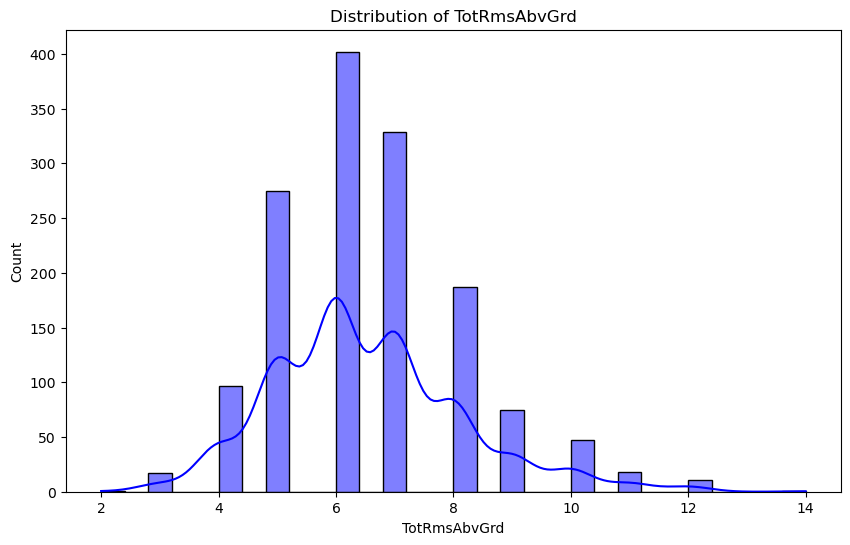

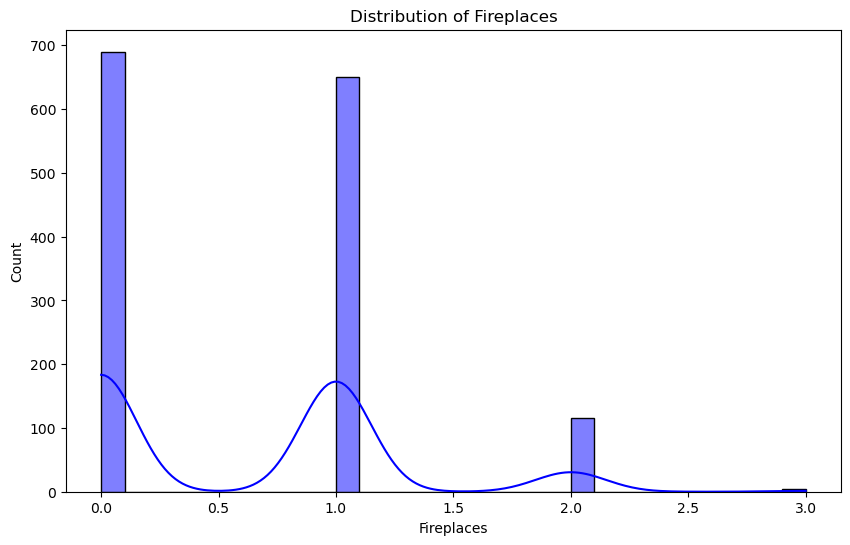

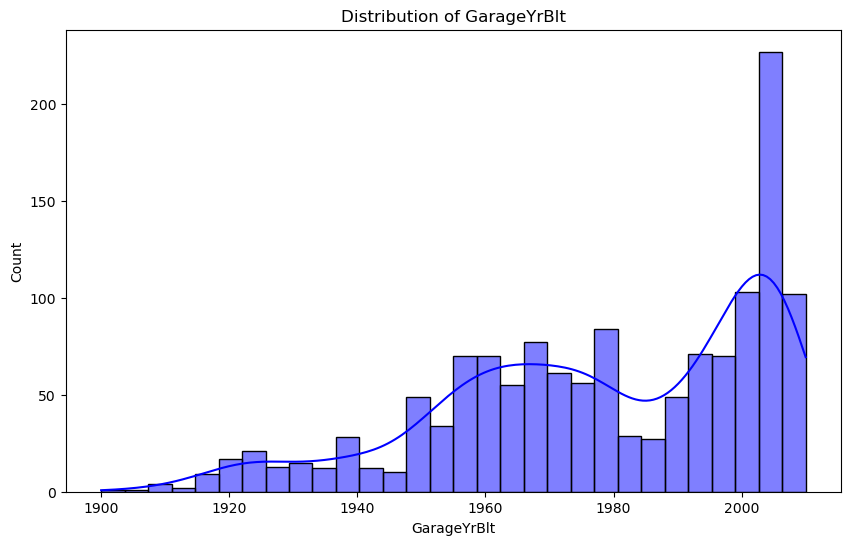

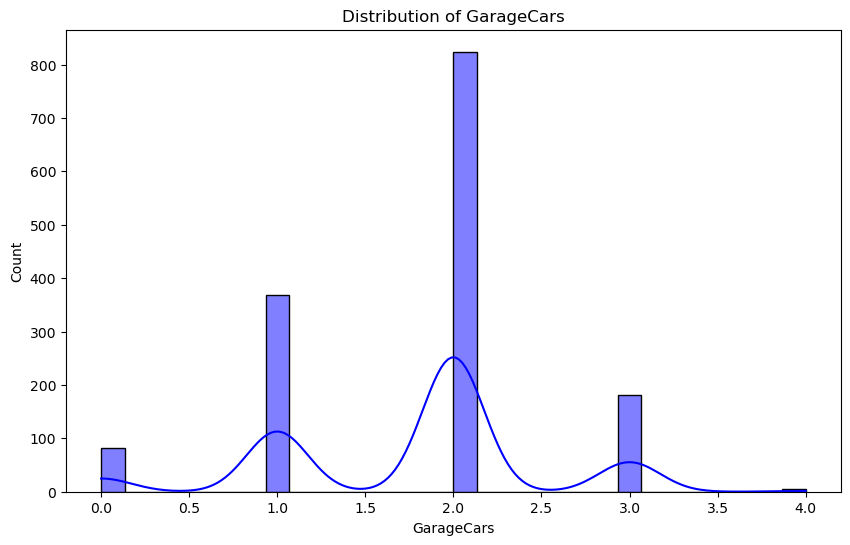

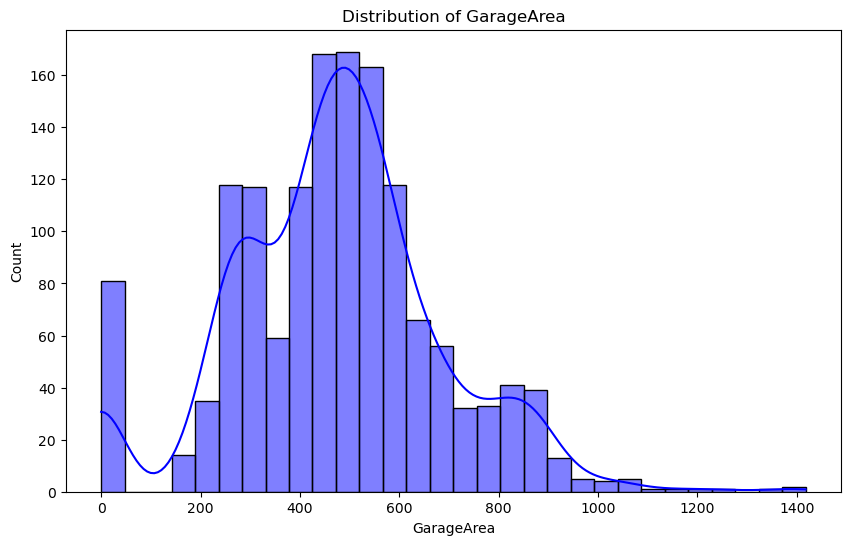

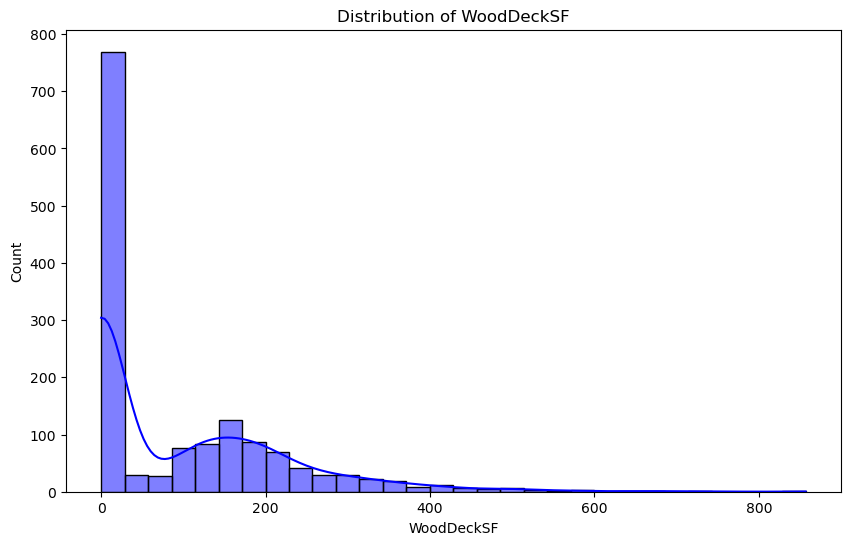

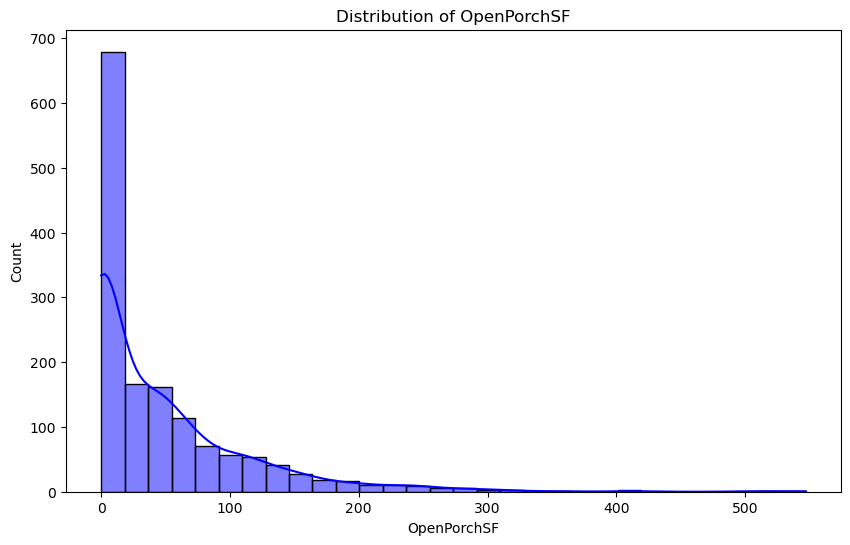

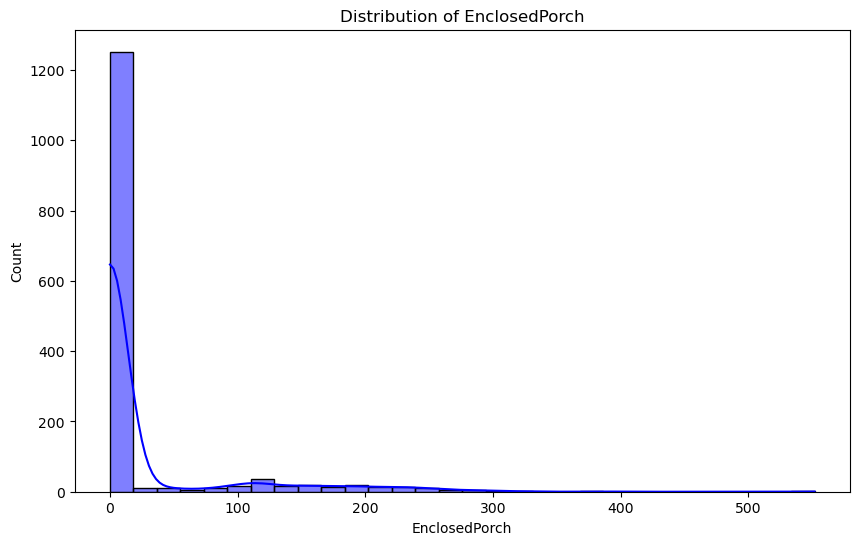

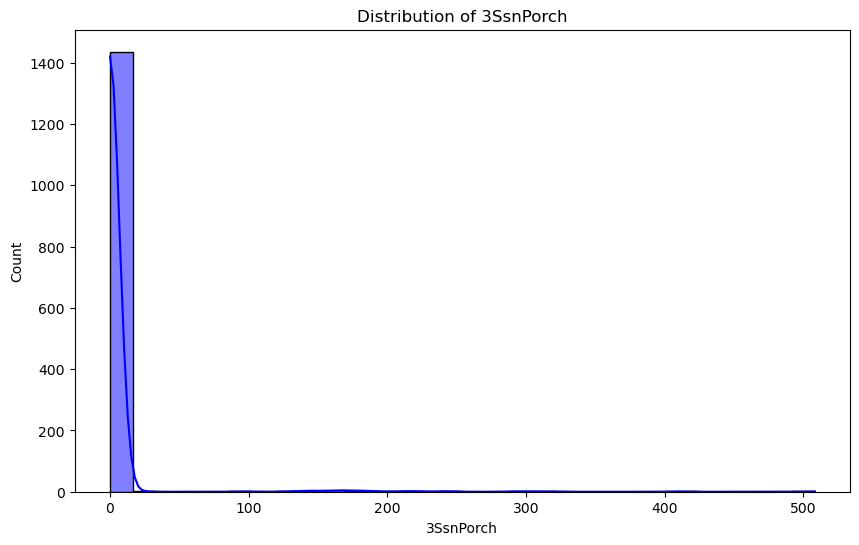

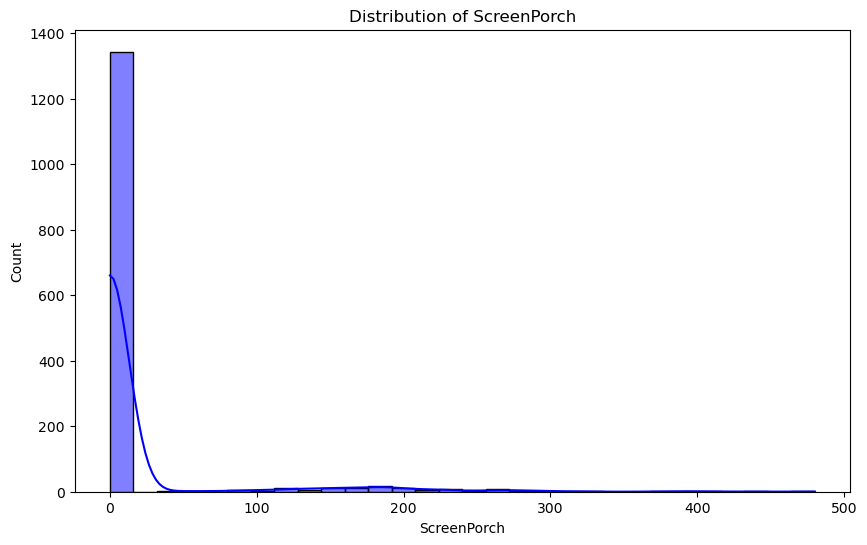

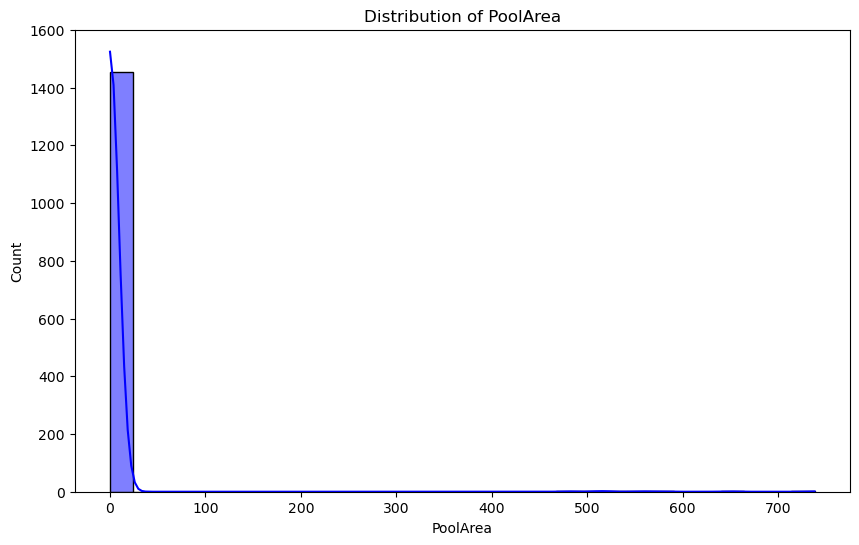

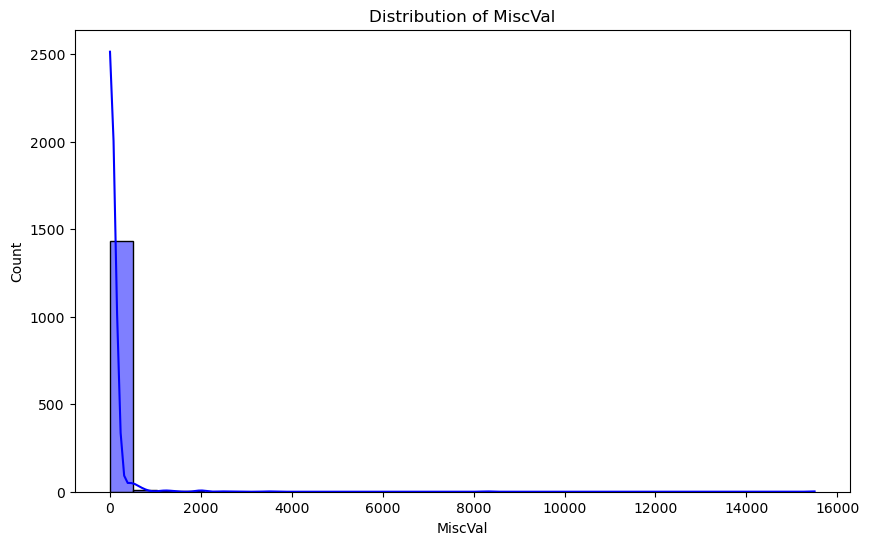

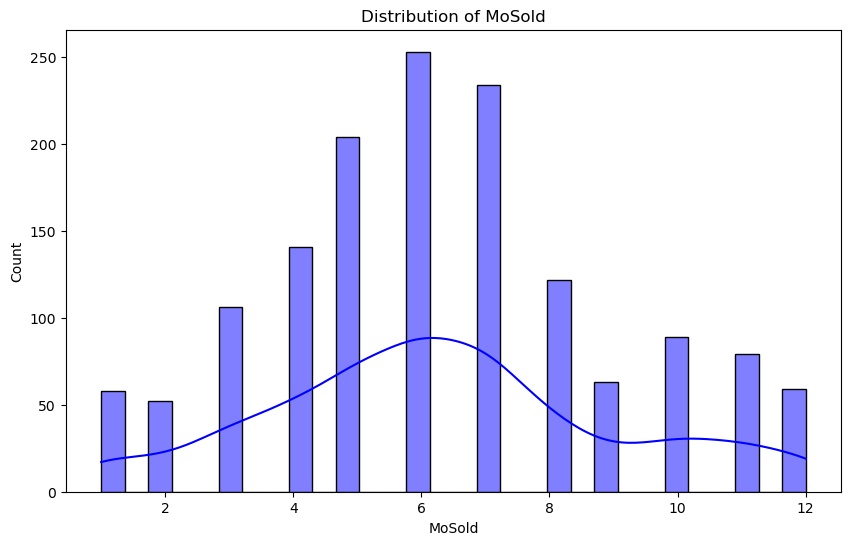

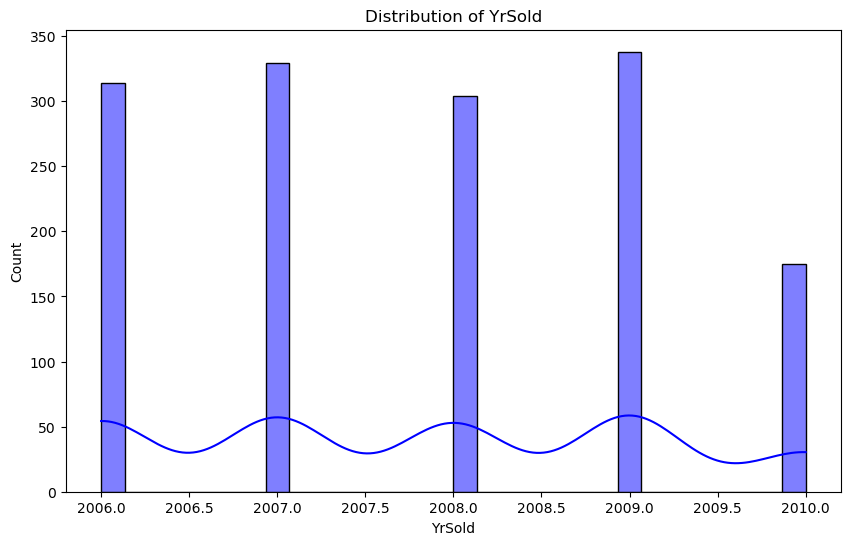

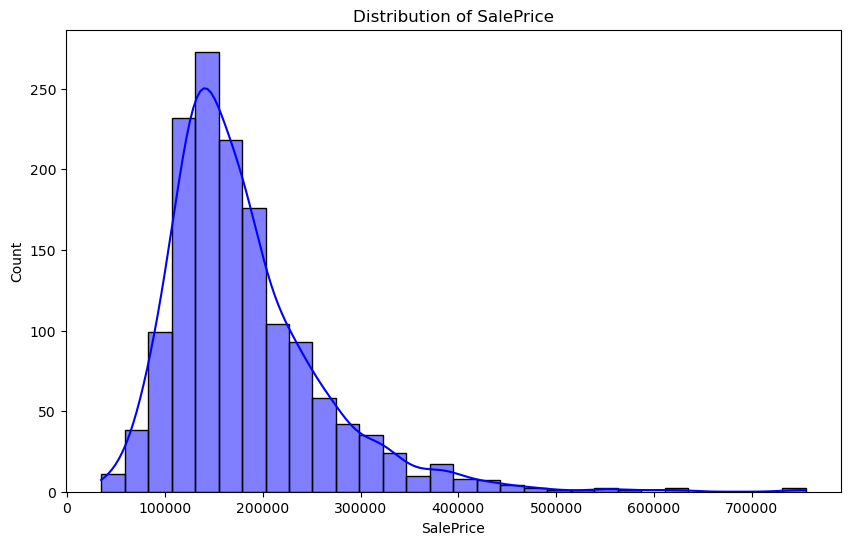

In [38]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10,6))
    sns.histplot(df_train[feature], kde=True, color='b', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10192\1246251860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette='pastel')


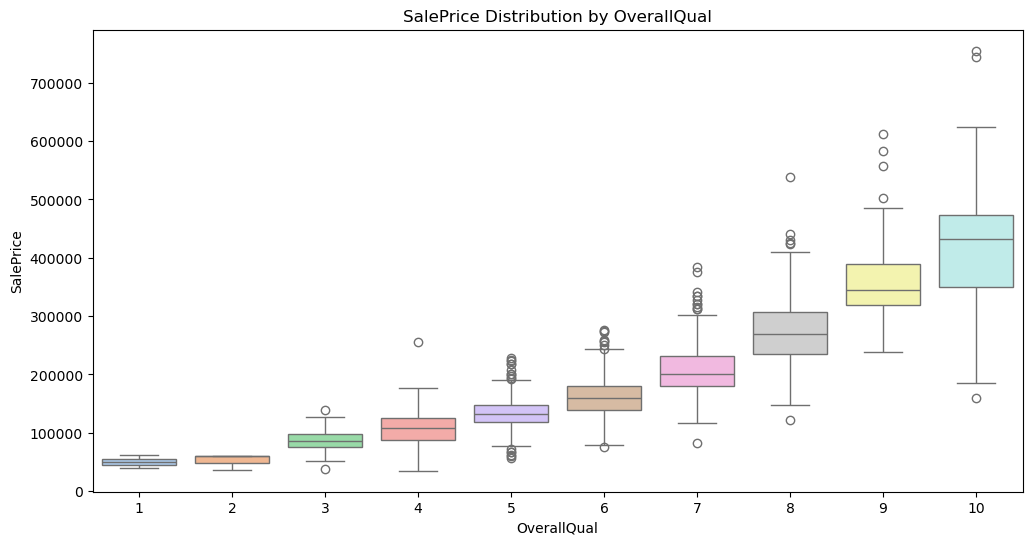

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train, palette='pastel')
plt.title('SalePrice Distribution by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

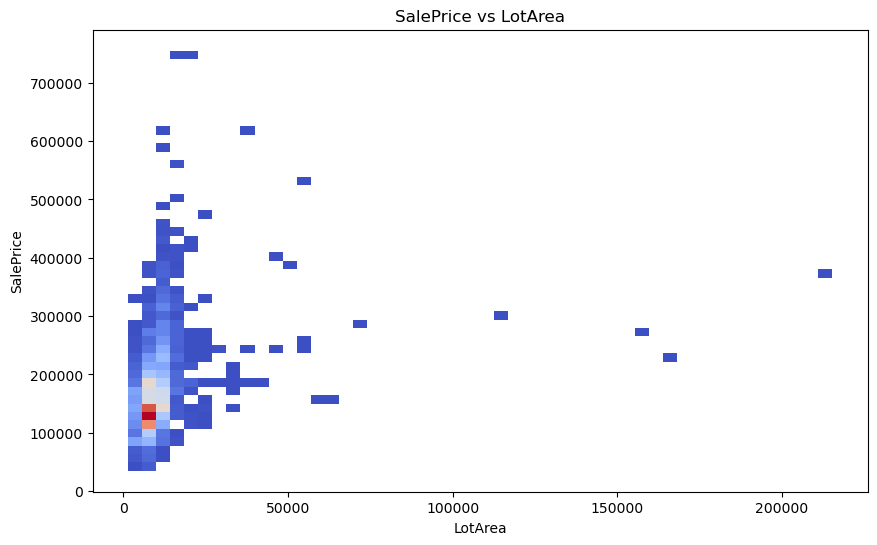

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(x='LotArea', y='SalePrice', data=df_train, bins=50, cmap='coolwarm')
plt.title('SalePrice vs LotArea')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10192\2214889410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GarageCars', y='SalePrice', data=df_train, palette='pastel')


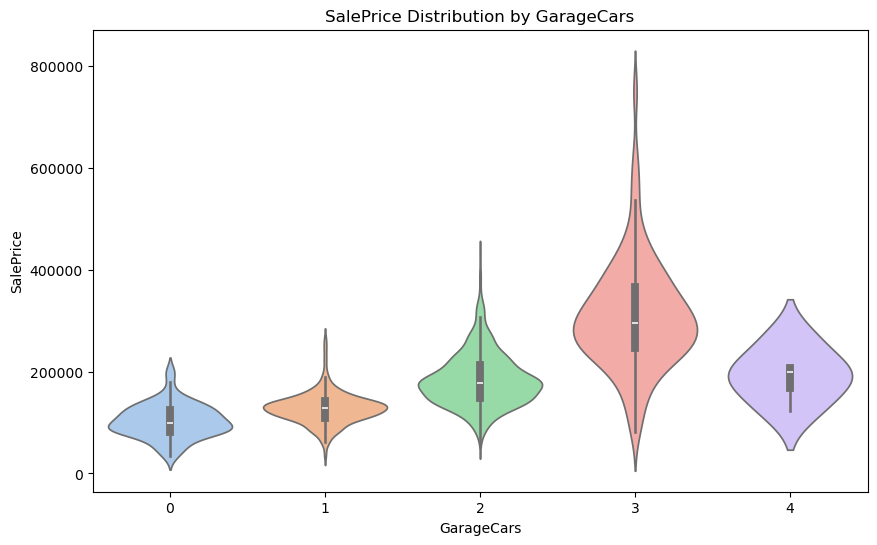

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='GarageCars', y='SalePrice', data=df_train, palette='pastel')
plt.title('SalePrice Distribution by GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

In [43]:
combined_data = pd.concat([df_train, df_test], axis=0)

In [44]:
categorical_cols = combined_data.select_dtypes(include=['object']).columns

In [46]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_combined = pd.DataFrame(OH_encoder.fit_transform(combined_data[categorical_cols]))

In [47]:
OH_cols_train = OH_cols_combined[:len(df_train)]
OH_cols_test = OH_cols_combined[len(df_train):]

In [48]:
categories = ['Category_1', 'Category_2', 'Category_3']
values_train = [np.random.randint(0, 2) for _ in range(len(categories))]
values_test = [np.random.randint(0, 2) for _ in range(len(categories))]

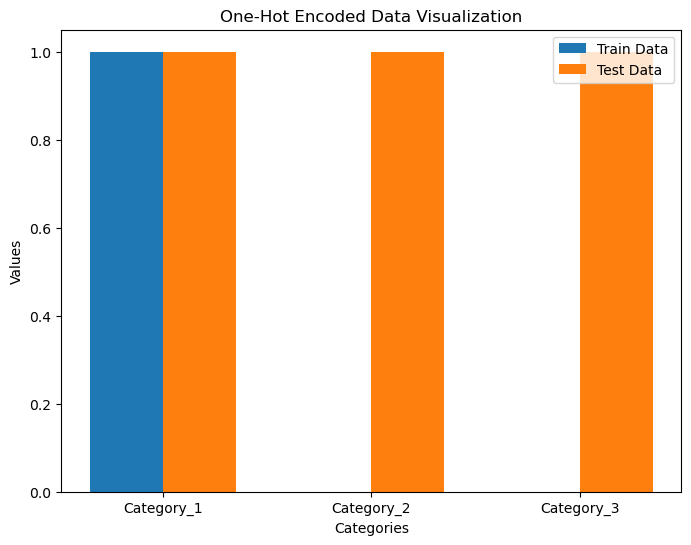

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(categories))

rects1 = ax.bar(index, values_train, bar_width, label='Train Data')
rects2 = ax.bar(index + bar_width, values_test, bar_width, label='Test Data')

ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('One-Hot Encoded Data Visualization')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

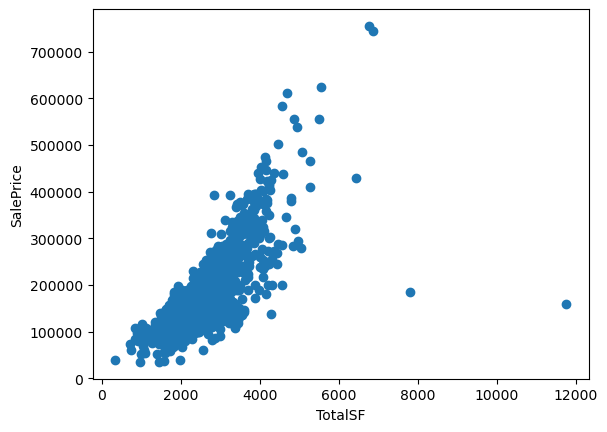

In [53]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
import matplotlib.pyplot as plt
plt.scatter(df_train['TotalSF'], df_train['SalePrice'])
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10192\3844257615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['GrLivArea_log'])


<Axes: xlabel='GrLivArea_log', ylabel='Density'>

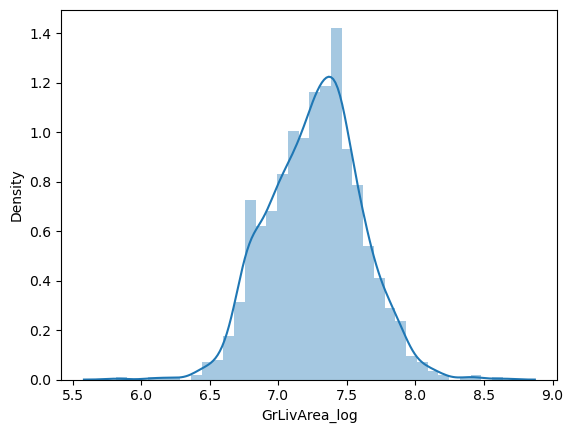

In [54]:
df_train['GrLivArea_log'] = np.log1p(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea_log'])

In [55]:
categorical_cols = ['MSZoning', 'Street', 'Alley']
for col in categorical_cols:
    dummies = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
    train_data = pd.concat([df_train, dummies], axis=1)

In [56]:
print(df_train[['MSZoning', 'Street', 'Alley']].head(10))

  MSZoning Street Alley
0       RL   Pave   NaN
1       RL   Pave   NaN
2       RL   Pave   NaN
3       RL   Pave   NaN
4       RL   Pave   NaN
5       RL   Pave   NaN
6       RL   Pave   NaN
7       RL   Pave   NaN
8       RM   Pave   NaN
9       RL   Pave   NaN


In [68]:
numerical_cols = ['LotFrontage', 'LotArea', 'GrLivArea']
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

In [69]:
print("After Feature Scaling:")
print(train_data[['LotFrontage', 'LotArea', 'GrLivArea']].head(10))

After Feature Scaling:
   LotFrontage  LotArea  GrLivArea
0         65.0     8450       1710
1         80.0     9600       1262
2         68.0    11250       1786
3         60.0     9550       1717
4         84.0    14260       2198
5         85.0    14115       1362
6         75.0    10084       1694
7          NaN    10382       2090
8         51.0     6120       1774
9         50.0     7420       1077


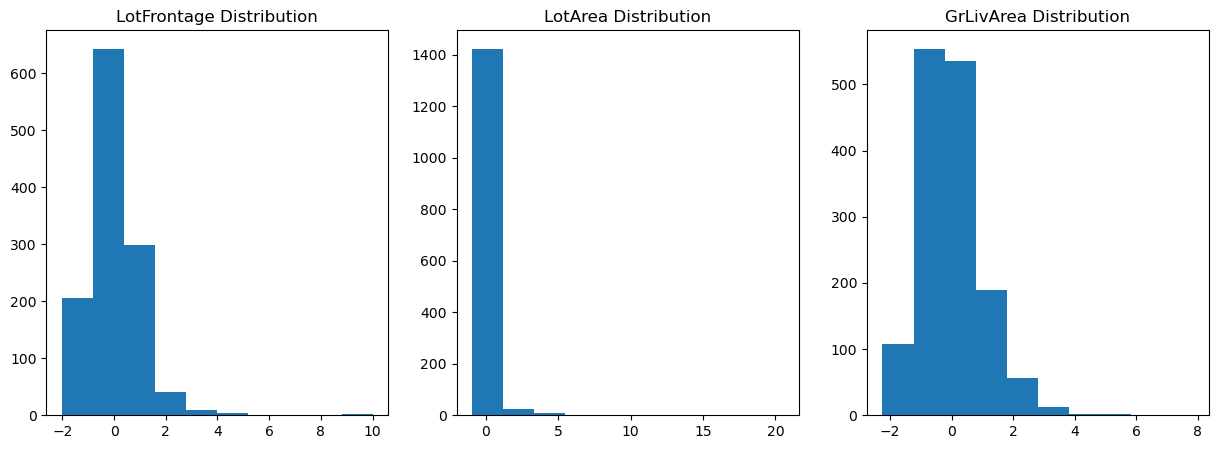

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df_train['LotFrontage'])
axs[0].set_title('LotFrontage Distribution')

axs[1].hist(df_train['LotArea'])
axs[1].set_title('LotArea Distribution')

axs[2].hist(df_train['GrLivArea'])
axs[2].set_title('GrLivArea Distribution')

plt.show()

In [71]:
combined_data = pd.concat([df_test, df_sample], axis=1)
print("Combined Data:")
print(combined_data.head(5))

Combined Data:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      6   2010   
1         Lvl    AllPub  ...    NaN    NaN        Gar2   12500      6   2010   
2         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      3   2010   
3         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2010   
4         HLS    AllPub  ...    NaN    NaN         NaN       0      1   2010   

  SaleType  SaleCondition    Id      SalePrice 

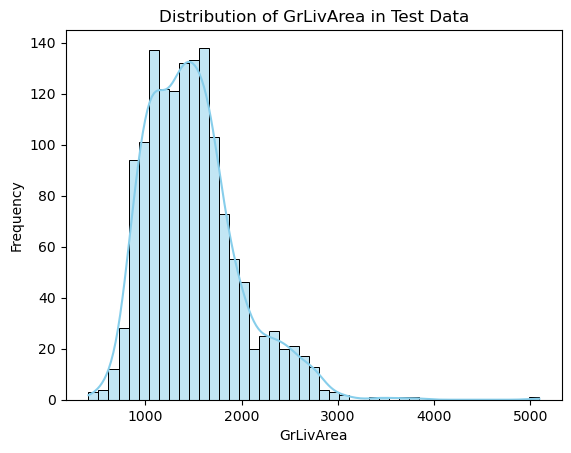

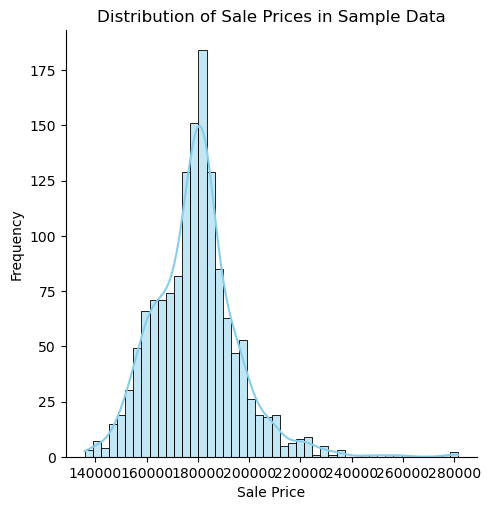

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10192\2285726392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverallQual', data=df_test, palette='muted')


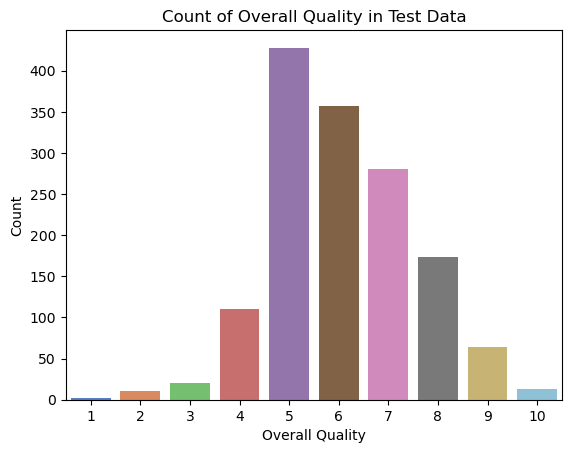

In [73]:
sns.histplot(df_test['GrLivArea'], kde=True, color='skyblue')
plt.title('Distribution of GrLivArea in Test Data')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

sns.displot(df_sample['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices in Sample Data')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


sns.countplot(x='OverallQual', data=df_test, palette='muted')
plt.title('Count of Overall Quality in Test Data')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()

In [78]:
# Handling missing values in numerical columns
for col in numerical_cols:
    combined_data[col].fillna(combined_data[col].mean(), inplace=True)

# Handling missing values in categorical columns
for col in categorical_cols:
    combined_data[col].fillna(combined_data[col].mode().iloc[0], inplace=True)

# Applying one-hot encoding to categorical columns
combined_data = pd.get_dummies(combined_data, columns=categorical_cols, drop_first=True)

# Creating a new feature representing the total area
combined_data['TotalArea'] = combined_data['LotArea'] + combined_data['TotalBsmtSF'] + combined_data['GrLivArea']

# Feature scaling using StandardScaler
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10192\3850784279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].fillna(combined_data[col].mean(), inplace=True)


KeyError: 'MSZoning'

In [79]:
print("Processed Combined Data:")
print(combined_data.head(5))

Processed Combined Data:
     Id  MSSubClass  LotFrontage   LotArea LotShape LandContour Utilities  \
0  1461          20     0.555587  0.363929      Reg         Lvl    AllPub   
1  1462          20     0.604239  0.897861      IR1         Lvl    AllPub   
2  1463          60     0.263676  0.809646      IR1         Lvl    AllPub   
3  1464          60     0.458284  0.032064      IR1         Lvl    AllPub   
4  1465         120    -1.244533 -0.971808      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood  ... SaleCondition    Id      SalePrice  \
0    Inside       Gtl        NAmes  ...        Normal  1461  169277.052498   
1    Corner       Gtl        NAmes  ...        Normal  1462  187758.393989   
2    Inside       Gtl      Gilbert  ...        Normal  1463  183583.683570   
3    Inside       Gtl      Gilbert  ...        Normal  1464  179317.477511   
4    Inside       Gtl      StoneBr  ...        Normal  1465  150730.079977   

  MSZoning_FV  MSZoning_RH  MSZoning_RL  MS

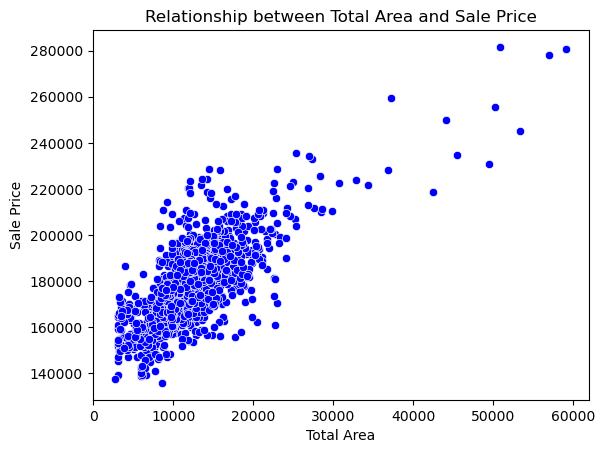

In [80]:
sns.scatterplot(x='TotalArea', y='SalePrice', data=combined_data, color='blue')
plt.title('Relationship between Total Area and Sale Price')
plt.xlabel('Total Area')
plt.ylabel('Sale Price')
plt.show()